<a href="https://colab.research.google.com/github/deirdrestela/Cas1-2-Project/blob/master/GrowthCurves7_18_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('07182020_ElentaPilot2_Strains1to4_DMSOandWater_5uldrug-plate1.txt',skiprows=43,header=0,sep='\t',nrows=289)

In [4]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# df.iloc[0:45,86:88]

In [5]:
#Averaging OD over first half hour
ODbaseline=df.iloc[0:4,2:].mean()

In [6]:
#Normalizing reads by subtracting OD baseline 
dfcorrected=df.iloc[:,2:]-ODbaseline
dfcorrected[dfcorrected<0]=0
dfcorrected

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,D1,D2,D3,D4,...,E9,E10,E11,E12,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.00025,0.000,0.00000,0.0000,0.00000,0.00000,0.00025,0.000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.0005,0.00000,0.00000,0.0000,0.001,0.00000,0.000,0.00000,0.000,0.0000,0.00000,0.00000,0.00000,0.00000,0.000,0.0000,0.00000,0.000,0.00025,0.000,0.0000,0.00000,0.0000,...,0.00000,0.000,0.00025,0.000,0.00000,0.00275,0.0000,0.000,0.00000,0.000,0.000,0.00000,0.001,0.00000,0.000,0.00000,0.000,0.00000,0.0000,0.0000,0.00000,0.000,0.0000,0.000,0.00000,0.000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000
1,0.00025,0.000,0.00025,0.0000,0.00000,0.00025,0.00000,0.000,0.00075,0.000,0.00000,0.00025,0.00000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000,0.00025,0.0000,0.000,0.00025,0.000,0.00000,0.000,0.0000,0.00025,0.00000,0.00025,0.00000,0.000,0.0000,0.00025,0.000,0.00125,0.002,0.0000,0.00000,0.0000,...,0.00025,0.000,0.00025,0.000,0.00000,0.00000,0.0000,0.000,0.00000,0.000,0.000,0.00025,0.000,0.00025,0.000,0.00025,0.000,0.00000,0.0000,0.0000,0.00000,0.000,0.0000,0.000,0.00075,0.000,0.00025,0.0000,0.00000,0.00000,0.00000,0.0005,0.00000,0.00000,0.00025,0.00025,0.00000,0.00075,0.00025,0.000
2,0.00025,0.000,0.00025,0.0005,0.00075,0.00025,0.00025,0.000,0.00000,0.000,0.00000,0.00025,0.00075,0.00075,0.0005,0.00025,0.0015,0.0005,0.00075,0.00025,0.0005,0.000,0.00025,0.000,0.00000,0.000,0.0005,0.00025,0.00075,0.00025,0.00025,0.001,0.0005,0.00025,0.000,0.00000,0.000,0.0005,0.00075,0.0005,...,0.00025,0.000,0.00000,0.000,0.00075,0.00000,0.0005,0.000,0.00075,0.000,0.000,0.00025,0.000,0.00025,0.000,0.00025,0.000,0.00075,0.0005,0.0000,0.00000,0.000,0.0005,0.000,0.00075,0.000,0.00025,0.0005,0.00075,0.02175,0.00025,0.0005,0.00125,0.00075,0.00025,0.00025,0.00075,0.00000,0.00025,0.000
3,0.00000,0.000,0.00125,0.0005,0.00075,0.00025,0.00025,0.001,0.00000,0.000,0.00075,0.00025,0.00000,0.00275,0.0015,0.00325,0.0045,0.0000,0.00275,0.00025,0.0005,0.000,0.00025,0.001,0.00075,0.001,0.0015,0.00125,0.00075,0.00025,0.00125,0.000,0.0005,0.00025,0.001,0.00000,0.000,0.0015,0.00075,0.0015,...,0.00025,0.000,0.00025,0.000,0.00075,0.00075,0.0015,0.001,0.00075,0.000,0.001,0.00025,0.000,0.00025,0.000,0.00025,0.002,0.00075,0.0025,0.0045,0.00175,0.001,0.0005,0.001,0.00000,0.000,0.00025,0.0005,0.00175,0.00000,0.00225,0.0015,0.00125,0.00075,0.00025,0.00025,0.00000,0.00000,0.00025,0.001
4,0.00025,0.001,0.00125,0.0015,0.00175,0.00125,0.00025,0.002,0.00000,0.000,0.00075,0.00125,0.00075,0.00375,0.0035,0.00425,0.0075,0.0005,0.00375,0.00125,0.0005,0.000,0.00125,0.002,0.00175,0.002,0.0015,0.00225,0.00175,0.00125,0.00125,0.000,0.0005,0.00025,0.000,0.00000,0.002,0.0025,0.00175,0.0015,...,0.00025,0.000,0.00025,0.000,0.00075,0.00175,0.0025,0.002,0.00175,0.001,0.001,0.00000,0.000,0.00025,0.001,0.00125,0.003,0.00175,0.0025,0.0045,0.00175,0.001,0.0015,0.001,0.00075,0.000,0.00025,0.0005,0.00475,0.00000,0.00225,0.0015,0.00125,0.00175,0.00025,0.00025,0.00075,0.00000,0.00000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.02525,0.033,0.04625,0.0555,0.06175,0.05725,0.05125,0.046,0.04275,0.040,0.03775,0.01625,0.04875,0.08975,0.0855,0.09525,0.0775,0.1035,0.13275,0.05825,0.0585,0.059,0.05525,0.000,0.03675,0.208,0.2465,0.14125,0.14775,0.14725,0.07025,0.055,0.0565,0.02425,0.056,0.03325,0.058,0.2205,0.11175,0.1155,...,0.05925,0.081,0.06725,0.049,0.08175,0.11575,0.1045,0.091,0.08675,0.084,0.080,0.06925,0.067,0.08325,0.069,0.00000,0.041,0.05875,0.0545,0.0685,0.05275,0.068,0.057

# All Samples 7-18-20



Text(0, 0.5, 'OD600')

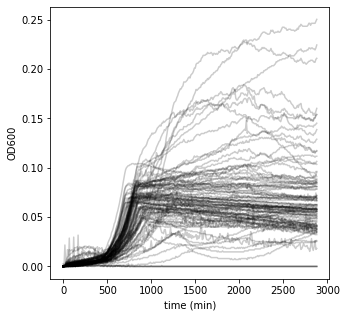

In [7]:
plt.figure(figsize=(5,5))
# samples = list(dfcorrected)- not sure why list is better 

for i in dfcorrected:
    plt.plot(np.arange(0,2890,10),dfcorrected[i], color ='k', alpha = .2)
plt.xlabel('time (min)')
plt.ylabel('OD600')

#Strain 1 All

Text(0.5, 1.0, 'H13 E Lenta All Strains')

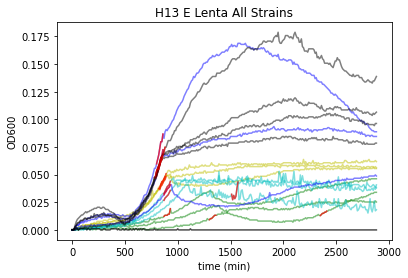

In [8]:
Strain1_FU= dfcorrected.iloc[:,0:3]
Strain1_Irino=dfcorrected.iloc[:,3:6]
Strain1_Pax=dfcorrected.iloc[:,9:12]
Strain1_Vin=dfcorrected.iloc[:,12:15]
Strain1_controls=dfcorrected.iloc[:,15:19]
MGAM_control1=dfcorrected.iloc[:,23]


for i in Strain1_FU:
    plt.plot(np.arange(0,2890,10),Strain1_FU[i], color ='g', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain1_FU[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_FU[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_FU[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain1_Irino:
    plt.plot(np.arange(0,2890,10),Strain1_Irino[i], color ='y', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain1_Irino[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Irino[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Irino[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain1_Pax:
    plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain1_Pax[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Pax[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Pax[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain1_Vin:
    plt.plot(np.arange(0,2890,10),Strain1_Vin[i], color ='b', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain1_Vin[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Vin[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Vin[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain1_controls:  
    plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain1_controls[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls[i][starttime:endtime+1],color ='r', alpha = .7)
plt.plot(np.arange(0,2890,10),MGAM_control1, color ='k', alpha = .7)
plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta All Strains')

In [9]:
Strain1_Vin.head()

,B1,B2,B3
0,0.00000,0.00000,0.0000
1,0.00000,0.00000,0.0000
2,0.00075,0.00075,0.0005
3,0.00000,0.00275,0.0015
4,0.00075,0.00375,0.0035


#5-FU Strain 1

In [10]:
#manually checking lag time 
#Strain1_FU[Strain1_FU>.004]

In [11]:
#Calculate Lag Time 
lagsFU1=[]
for i in Strain1_FU:
  lagsFU1.append(next(x[0] for x in list(enumerate(Strain1_FU[i])) if x[1]>.005))
  print(lagsFU1)
lagtimeFU1=round(np.average(lagsFU1))
print(lagtimeFU1)

[112]
[112, 68]
[112, 68, 36]
72.0


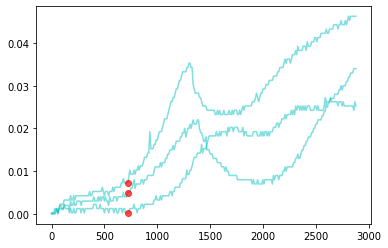

In [12]:
#visualizinglagtime
for i in Strain1_FU: 
    plt.plot(np.arange(0,2890,10),Strain1_FU[i], color ='c', alpha = .5)
    plt.plot(lagtimeFU1*10,Strain1_FU[i][lagtimeFU1],'ro',alpha=.7) 
    

Growth rates FU= [7.14285714285714e-05, 6.0714285714285864e-05, 8.57142857142858e-05]
Growth times FU [130, 235, 87] [136, 241, 93]
Growth rates control [0.00030357142857142844, 0.0002964285714285713, 0.0002928571428571431, 0.0003214285714285714]
Growth times controls [78, 79, 79, 82] [84, 85, 85, 88]
Growth curve sig: Ttest_indResult(statistic=-23.916013126994656, pvalue=2.380997534611589e-06)


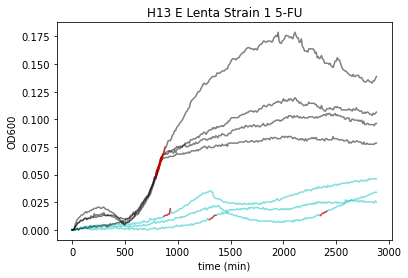

In [13]:
#Comparing drug condition to DMSO controls

MGR_FU1=[]
MGstarttimes_FU1=[]
MGendtimes_FU1=[]

MGR_controls1=[]
MGstarttimes_controls1=[]
MGendtimes_controls1=[]

for i in Strain1_FU: 
    plt.plot(np.arange(0,2890,10),Strain1_FU[i], color ='c', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain1_FU[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_FU[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_FU[i][starttime:endtime+1],color ='r', alpha = .7)
    MGR_FU1.append(slopemax)
    MGstarttimes_FU1.append(starttime)
    MGendtimes_FU1.append(endtime)

for i in Strain1_controls: 
    plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain1_controls[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls[i][starttime:endtime+1],color ='r', alpha = .7)
    MGR_controls1.append(slopemax)
    MGstarttimes_controls1.append(starttime)
    MGendtimes_controls1.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 1 5-FU')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceFU1=stats.ttest_ind(MGR_FU1,MGR_controls1)

print('Growth rates FU=',MGR_FU1)
print('Growth times FU', MGstarttimes_FU1, MGendtimes_FU1)
print('Growth rates control',MGR_controls1)
print('Growth times controls', MGstarttimes_controls1, MGendtimes_controls1)

print('Growth curve sig:',CurvesignificanceFU1)
if CurvesignificanceFU1[1]<.05:
  StrainFU1_G_Sig='Yes'
else:
  StrainFU1_G_Sig='No'


Growth rates FU= [7.380952380952379e-05, 6.0714285714285844e-05, 7.738095238095243e-05]
Growth times FU [130, 235, 109] [136, 241, 115]
Growth rates control [0.00029999999999999987, 0.0002869047619047617, 0.0002821428571428573, 0.0003166666666666667]
Growth times controls [78, 79, 79, 82] [84, 84, 85, 87]
Growth curve sig: Ttest_indResult(statistic=-22.39740926405456, pvalue=3.2967315785557956e-06)


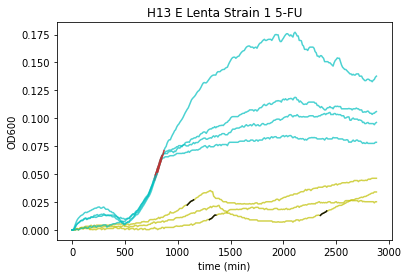

In [14]:
#CURVE SMOOTHING 
MGR_FU1_corrected=[]
MGstarttimes_FU1_corrected=[]
MGendtimes_FU1_corrected=[]
Strain1_FU_update=pd.DataFrame()

MGR_controls1_corrected=[]
MGstarttimes_controls1_corrected=[]
MGendtimes_controls1_corrected=[]
Strain1_controls_update=pd.DataFrame()


for i in Strain1_FU:
  Strain1_FU_corrected=[0]
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_FU)-1):
    if abs(np.diff(Strain1_FU[i])[a]>.001):
      newdatapoint=np.average(Strain1_FU[i][a:a+3])
      Strain1_FU_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_FU[i][a+1]
      Strain1_FU_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_FU_corrected, color ='y', alpha =.7)
  Strain1_FU_update[i]=Strain1_FU_corrected
  #calculate corrected new max slope 
  slopemaxcorrected=0
  starttimecorrected=0
  endtimecorrected=6
  for a in range(0,len(Strain1_FU_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_FU_corrected[a:a+7])[0]
    if slope>slopemaxcorrected:
        slopemaxcorrected=slope
        starttimecorrected=a
        endtimecorrected=a+6
  plt.plot(np.arange(0,2890,10)[starttimecorrected:endtimecorrected+1],Strain1_FU_corrected[starttimecorrected:endtimecorrected+1],color ='k', alpha = .9)
  MGR_FU1_corrected.append(slopemaxcorrected)
  MGstarttimes_FU1_corrected.append(starttimecorrected)
  MGendtimes_FU1_corrected.append(endtimecorrected)
for i in Strain1_controls: 
  Strain1_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_controls)-1):
    if abs(np.diff(Strain1_controls[i])[a]>.001):
      newdatapoint=np.average(Strain1_controls[i][a:a+3])
      Strain1_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_controls[i][a+1]
      Strain1_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_controls_corrected, color ='c', alpha =.7)
  Strain1_controls_update[i]=Strain1_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls1_corrected.append(slopemax)
  MGstarttimes_controls1_corrected.append(starttime)
  MGendtimes_controls1_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 1 5-FU')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceFU1_corrected=stats.ttest_ind(MGR_FU1_corrected,MGR_controls1_corrected)

print('Growth rates FU=',MGR_FU1_corrected)
print('Growth times FU', MGstarttimes_FU1_corrected, MGendtimes_FU1_corrected)
print('Growth rates control',MGR_controls1_corrected)
print('Growth times controls', MGstarttimes_controls1, MGendtimes_controls1_corrected)

print('Growth curve sig:',CurvesignificanceFU1_corrected)

if CurvesignificanceFU1_corrected[1]<.05:
  StrainFU1_G_Sig_corrected='Yes'
else:
  StrainFU1_G_Sig_corrected='No'

In [15]:
# print(Strain1_FU_update)

In [16]:
MaxOD_FU1=[]
MaxOD_controls1=[]
for i in Strain1_FU:
  MaxOD_FU1.append(Strain1_FU.nlargest(10,[i])[i].mean())
for i in Strain1_controls:
  MaxOD_controls1.append(Strain1_controls.nlargest(10,[i])[i].mean())

ODsignificanceFU1=stats.ttest_ind(MaxOD_FU1,MaxOD_controls1)

print('Average Max OD FU reps 1-3:',MaxOD_FU1)
print('Average Max OD Control reps 1-3:',MaxOD_controls1)
print('OD sig:',ODsignificanceFU1)

if ODsignificanceFU1[1]<.05:
  StrainFU1_OD_Sig='Yes'
else:
  StrainFU1_OD_Sig='No'


Average Max OD FU reps 1-3: [0.026449999999999994, 0.03269999999999999, 0.045950000000000005]
Average Max OD Control reps 1-3: [0.10464999999999998, 0.08430000000000001, 0.11810000000000001, 0.17625000000000002]
OD sig: Ttest_indResult(statistic=-3.597971532516187, pvalue=0.015576526932223013)


In [17]:
MaxOD_FU1_corrected=[]
MaxOD_controls1_corrected=[]
for i in Strain1_FU_update:
  MaxOD_FU1_corrected.append(Strain1_FU_update.nlargest(10,[i])[i].mean())
for i in Strain1_controls_update:
  MaxOD_controls1_corrected.append(Strain1_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceFU1_corrected=stats.ttest_ind(MaxOD_FU1_corrected,MaxOD_controls1_corrected)

print('Average Max OD FU reps 1-3:',MaxOD_FU1_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls1_corrected)
print('OD sig:',ODsignificanceFU1_corrected)

if ODsignificanceFU1_corrected[1]<.05:
  StrainFU1_OD_Sig_corrected='Yes'
else:
  StrainFU1_OD_Sig_corrected='No'

Average Max OD FU reps 1-3: [0.026283333333333332, 0.03259999999999999, 0.04578333333333333]
Average Max OD Control reps 1-3: [0.10425, 0.08410000000000001, 0.11769999999999999, 0.17545]
OD sig: Ttest_indResult(statistic=-3.607083715924808, pvalue=0.015427707477884465)


In [18]:
#Calculate Half Log Phase
Strain1FU_LagTime=lagtimeFU1
Strain1FU_Start=round(np.average(MGstarttimes_FU1_corrected))
Strain1FU_End=round(np.average(MGendtimes_FU1_corrected))
Strain1FU_MGR_Time=(Strain1FU_End-3)
print(Strain1FU_MGR_Time)
Strain1_FU_HalfLogPhase=Strain1FU_MGR_Time-Strain1FU_LagTime
print(Strain1_FU_HalfLogPhase)



161.0
89.0


In [19]:
#Collect Data summary 
Strain1FU_MGR=np.average(MGR_FU1_corrected)
Strain1FU_Growth_zstat=CurvesignificanceFU1_corrected[0]
Strain1FU_Growth_pvalue=CurvesignificanceFU1_corrected[1]
Strain1FU_OD=np.average(MaxOD_FU1_corrected)
Strain1FU_OD_zstat=ODsignificanceFU1_corrected[0]
Strain1FU_OD_pvalue=ODsignificanceFU1_corrected[1]

Strain1Data=pd.DataFrame(columns=['Lagtime','HalfLogTime','MGR_Time',\
'Max_GR','Growth_Z','Growth_Pvalue','Growth Significant?',\
'Max_OD','OD_Z','OD_Pvalue','OD Significant?'])
Strain1Data=Strain1Data.append({'Lagtime':Strain1FU_LagTime,
'HalfLogTime':Strain1_FU_HalfLogPhase, 'MGR_Time':Strain1FU_MGR_Time,\
'Max_GR':Strain1FU_MGR,'Growth_Z':Strain1FU_Growth_zstat,\
'Growth_Pvalue':Strain1FU_Growth_pvalue,\
'Growth Significant?':StrainFU1_G_Sig_corrected,\
'Max_OD':Strain1FU_OD,'OD_Z':Strain1FU_OD_zstat,\
'OD_Pvalue':Strain1FU_OD_pvalue,'OD Significant?':StrainFU1_OD_Sig_corrected},\
ignore_index=True)
Strain1Data=Strain1Data.rename(index={0:'5-Fluorouracil'})
Strain1Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,72.0,89.0,161.0,0.000071,-22.397409,0.000003,Yes,0.034889,-3.607084,0.015428,Yes


In [20]:
# Strain1Data

In [21]:
# FinOD_FU1=[]
# FinOD_controls1=[]
# for i in Strain1_FU: 
#   ODstart=150
#   ODend=300  
#   plt.plot(np.arange(0,2890,10),Strain1_FU[i], color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain1_FU[i][ODstart:ODend+1],color='r', alpha = .7)
#   ODmean=Strain1_FU[i][ODstart:ODend+1].describe()[1]
#   FinOD_FU1.append(ODmean)
# for i in Strain1_controls:
#   ODstart=150
#   ODend=300  
#   plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain1_controls[i][ODstart:ODend+1],color='r', alpha = .7)
#   ODmean=Strain1_controls[i][ODstart:ODend+1].describe()[1]
#   FinOD_controls1.append(ODmean)
# ODsignificanceFU1=stats.ttest_ind(FinOD_FU1,FinOD_controls1)
# print('Average ODs FU=',FinOD_FU1)
# print('Average ODs Control=',FinOD_controls1)
# print('OD sig:',ODsignificanceFU1)

# Irino Strain 1

In [22]:
#Lagtimes
# (Strain1_Irino[Strain1_Irino>.004])

In [23]:
#Calculate Lag Time 
lagsIrino1=[]
for i in Strain1_Irino:
  lagsIrino1.append(next(x[0] for x in list(enumerate(Strain1_Irino[i])) if x[1]>.005))
  print(lagsIrino1)
lagtimeIrino1=round(np.average(lagsIrino1))
print(lagtimeIrino1)

[18]
[18, 18]
[18, 18, 19]
18.0


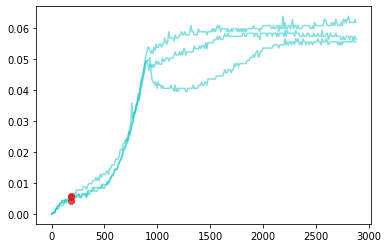

In [24]:
for i in Strain1_Irino: 
    plt.plot(np.arange(0,2890,10),Strain1_Irino[i], color ='c', alpha = .5)
    plt.plot(lagtimeIrino1*10,Strain1_Irino[i][lagtimeIrino1],'ro',alpha=.7) 
    

Growth rates Irino= [0.0001857142857142856, 0.00019523809523809506, 0.00018333333333333355]
Growth times Irino [83, 83, 81] [89, 89, 87]
Growth rates control [0.00029999999999999987, 0.0002869047619047617, 0.0002821428571428573, 0.0003166666666666667]
Growth times controls [78, 78, 79, 81] [84, 84, 85, 87]
Growth curve sig: Ttest_indResult(statistic=-11.238279778700228, pvalue=9.742053761223952e-05)


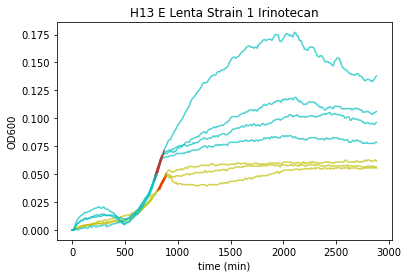

In [25]:
#Comparing drug condition to DMSO controls

MGR_Irino1_corrected=[]
MGstarttimes_Irino1_corrected=[]
MGendtimes_Irino1_corrected=[]
Strain1_Irino_update=pd.DataFrame()

MGR_controls1_corrected=[]
MGstarttimes_controls1_corrected=[]
MGendtimes_controls1_corrected=[]
Strain1_controls_update=pd.DataFrame()

for i in Strain1_Irino: 
  Strain1_Irino_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_Irino[i], color ='c', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_Irino)-1):
    if abs(np.diff(Strain1_Irino[i])[a]>.001):
      newdatapoint=np.average(Strain1_Irino[i][a:a+3])
      Strain1_Irino_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_Irino[i][a+1]
      Strain1_Irino_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_Irino_corrected, color ='y', alpha =.7)
  Strain1_Irino_update[i]=Strain1_Irino_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_Irino_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Irino_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Irino_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Irino1_corrected.append(slopemax)
  MGstarttimes_Irino1_corrected.append(starttime)
  MGendtimes_Irino1_corrected.append(endtime)

for i in Strain1_controls: 
  Strain1_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_controls)-1):
    if abs(np.diff(Strain1_controls[i])[a]>.001):
      newdatapoint=np.average(Strain1_controls[i][a:a+3])
      Strain1_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_controls[i][a+1]
      Strain1_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_controls_corrected, color ='c', alpha =.7)
  Strain1_controls_update[i]=Strain1_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls1_corrected.append(slopemax)
  MGstarttimes_controls1_corrected.append(starttime)
  MGendtimes_controls1_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 1 Irinotecan')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceIrino1_corrected=stats.ttest_ind(MGR_Irino1_corrected,MGR_controls1_corrected)

print('Growth rates Irino=',MGR_Irino1_corrected)
print('Growth times Irino', MGstarttimes_Irino1_corrected, MGendtimes_Irino1_corrected)
print('Growth rates control',MGR_controls1_corrected)
print('Growth times controls', MGstarttimes_controls1_corrected, MGendtimes_controls1_corrected)

print('Growth curve sig:',CurvesignificanceIrino1_corrected)

if CurvesignificanceIrino1_corrected[1]<.05:
  StrainIrino1_G_Sig_corrected='Yes'
else:
  StrainIrino1_G_Sig_corrected='No'

In [26]:
MaxOD_Irino1_corrected=[]
MaxOD_controls1_corrected=[]
for i in Strain1_Irino_update:
  MaxOD_Irino1_corrected.append(Strain1_Irino_update.nlargest(10,[i])[i].mean())
for i in Strain1_controls_update:
  MaxOD_controls1_corrected.append(Strain1_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceIrino1_corrected=stats.ttest_ind(MaxOD_Irino1_corrected,MaxOD_controls1_corrected)

print('Average Max OD Irino reps 1-3:',MaxOD_Irino1_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls1_corrected)
print('OD sig:',ODsignificanceIrino1_corrected)

if ODsignificanceIrino1_corrected[1]<.05:
  StrainIrino1_OD_Sig_corrected='Yes'
else:
  StrainIrino1_OD_Sig_corrected='No'

Average Max OD Irino reps 1-3: [0.055633333333333326, 0.06228333333333332, 0.05825000000000001]
Average Max OD Control reps 1-3: [0.10425, 0.08410000000000001, 0.11769999999999999, 0.17545]
OD sig: Ttest_indResult(statistic=-2.6502012376226025, pvalue=0.04541545188831781)


In [27]:
# FinOD_Irino1=[]
# FinOD_controls1=[]
# for i in Strain1_Irino: 
#   ODstart=150
#   ODend=300  
#   plt.plot(np.arange(0,2890,10),Strain1_Irino[i], color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain1_Irino[i][ODstart:ODend+1],color='r', alpha = .7)
#   ODmean=Strain1_Irino[i][ODstart:ODend+1].describe()[1]
#   FinOD_Irino1.append(ODmean)
# for i in Strain1_controls:
#   ODstart=150
#   ODend=300  
#   plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain1_controls[i][ODstart:ODend+1],color='r', alpha = .7)
#   ODmean=Strain1_controls[i][ODstart:ODend+1].describe()[1]
#   FinOD_controls1.append(ODmean)
# ODsignificanceIrino1=stats.ttest_ind(FinOD_Irino1,FinOD_controls1)
# print('Average ODs Irino=',FinOD_Irino1)
# print('Average ODs Control=',FinOD_controls1)
# print('OD sig:',ODsignificanceIrino1)

In [28]:
#Calculate Half Log Phase
Strain1Irino_LagTime=lagtimeIrino1
Strain1Irino_Start=round(np.average(MGstarttimes_Irino1_corrected))
Strain1Irino_End=round(np.average(MGendtimes_Irino1_corrected))
Strain1Irino_MGR_Time=(Strain1Irino_End-3)
print(Strain1Irino_MGR_Time)
Strain1_Irino_HalfLogPhase=Strain1Irino_MGR_Time-Strain1Irino_LagTime
print(Strain1_Irino_HalfLogPhase)

85.0
67.0


In [29]:
#Collect Data summary 
Strain1Irino_MGR=np.average(MGR_Irino1_corrected)
Strain1Irino_Growth_zstat=CurvesignificanceIrino1_corrected[0]
Strain1Irino_Growth_pvalue=CurvesignificanceIrino1_corrected[1]
Strain1Irino_OD=np.average(MaxOD_Irino1_corrected)
Strain1Irino_OD_zstat=ODsignificanceIrino1_corrected[0]
Strain1Irino_OD_pvalue=ODsignificanceIrino1_corrected[1]

Strain1Data=Strain1Data.append({'Lagtime':Strain1Irino_LagTime,\
'HalfLogTime':Strain1_Irino_HalfLogPhase, 'MGR_Time':Strain1Irino_MGR_Time,\
'Max_GR':Strain1Irino_MGR,'Growth_Z':Strain1Irino_Growth_zstat,\
'Growth_Pvalue':Strain1Irino_Growth_pvalue,'Growth Significant?':StrainIrino1_G_Sig_corrected,'Max_OD':Strain1Irino_OD,\
'OD_Z':Strain1Irino_OD_zstat,'OD_Pvalue':Strain1Irino_OD_pvalue,'OD Significant?': StrainIrino1_OD_Sig_corrected},ignore_index=True)
Strain1Data=Strain1Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan'})
Strain1Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,72.0,89.0,161.0,0.000071,-22.397409,0.000003,Yes,0.034889,-3.607084,0.015428,Yes
Irinotecan,18.0,67.0,85.0,0.000188,-11.238280,0.000097,Yes,0.058722,-2.650201,0.045415,Yes


# Vin Strain 1

In [30]:
#Calculate Lag Time 
lagsVin1=[]
for i in Strain1_Vin:
  lagsVin1.append(next(x[0] for x in list(enumerate(Strain1_Vin[i])) if x[1]>.013))
  print(lagsVin1)
lagtimeVin1=round(np.average(lagsVin1))
print(lagtimeVin1)

[66]
[66, 24]
[66, 24, 60]
50.0


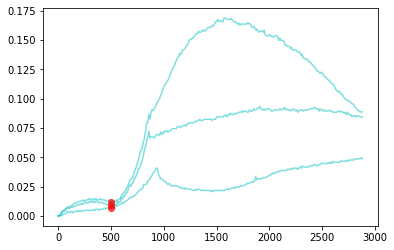

In [31]:
#visualizinglagtime
for i in Strain1_Vin: 
    plt.plot(np.arange(0,2890,10),Strain1_Vin[i], color ='c', alpha = .5)
    plt.plot(lagtimeVin1*10,Strain1_Vin[i][lagtimeVin1],'ro',alpha=.7) 
    

In [32]:
#Lagtimes
#(Strain1_Vin[Strain1_Vin>.005])

Growth rates Vin= [0.00014047619047619027, 0.0004214285714285713, 0.00037380952380952344]
Growth times Vin [86, 79, 79] [92, 85, 85]
Growth rates control [0.00029999999999999987, 0.0002869047619047617, 0.0002821428571428573, 0.0003166666666666667]
Growth times controls [78, 78, 79, 81] [84, 84, 85, 87]
Growth curve sig: Ttest_indResult(statistic=0.21141239295323097, pvalue=0.8409124336163265)


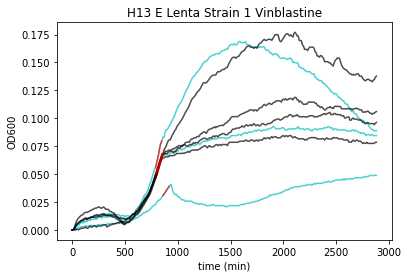

In [33]:
#Comparing drug condition to DMSO controls

MGR_Vin1_corrected=[]
MGstarttimes_Vin1_corrected=[]
MGendtimes_Vin1_corrected=[]
Strain1_Vin_update=pd.DataFrame()

MGR_controls1_corrected=[]
MGstarttimes_controls1_corrected=[]
MGendtimes_controls1_corrected=[]
Strain1_controls_update=pd.DataFrame()

for i in Strain1_Vin: 
  #plt.plot(np.arange(0,2890,10),Strain1_Vin[i], color ='c', alpha = .5)
  Strain1_Vin_corrected=[0]
  for a in range(0,len(Strain1_Vin)-1):
    if abs(np.diff(Strain1_Vin[i])[a]>.001):
      newdatapoint=np.average(Strain1_Vin[i][a:a+3])
      Strain1_Vin_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_Vin[i][a+1]
      Strain1_Vin_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_Vin_corrected, color ='c', alpha =.7)
  Strain1_Vin_update[i]=Strain1_Vin_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_Vin_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Vin_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Vin_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Vin1_corrected.append(slopemax)
  MGstarttimes_Vin1_corrected.append(starttime)
  MGendtimes_Vin1_corrected.append(endtime)

for i in Strain1_controls: 
  Strain1_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_controls)-1):
    if abs(np.diff(Strain1_controls[i])[a]>.001):
      newdatapoint=np.average(Strain1_controls[i][a:a+3])
      Strain1_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_controls[i][a+1]
      Strain1_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_controls_corrected, color ='k', alpha =.7)
  Strain1_controls_update[i]=Strain1_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls1_corrected.append(slopemax)
  MGstarttimes_controls1_corrected.append(starttime)
  MGendtimes_controls1_corrected.append(endtime)



plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 1 Vinblastine')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceVin1_corrected=stats.ttest_ind(MGR_Vin1_corrected,MGR_controls1_corrected)

print('Growth rates Vin=',MGR_Vin1_corrected)
print('Growth times Vin', MGstarttimes_Vin1_corrected, MGendtimes_Vin1_corrected)
print('Growth rates control',MGR_controls1_corrected)
print('Growth times controls', MGstarttimes_controls1_corrected, MGendtimes_controls1_corrected)

print('Growth curve sig:',CurvesignificanceVin1_corrected)

if CurvesignificanceVin1_corrected[1]<.05:
  StrainVin1_G_Sig_corrected='Yes'
else:
  StrainVin1_G_Sig_corrected='No'

In [34]:
MaxOD_Vin1_corrected=[]
MaxOD_controls1_corrected=[]
for i in Strain1_Vin_update:
  MaxOD_Vin1_corrected.append(Strain1_Vin_update.nlargest(10,[i])[i].mean())
for i in Strain1_controls_update:
  MaxOD_controls1_corrected.append(Strain1_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceVin1_corrected=stats.ttest_ind(MaxOD_Vin1_corrected,MaxOD_controls1_corrected)

print('Average Max OD Vin reps 1-3:',MaxOD_Vin1_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls1_corrected)
print('OD sig:',ODsignificanceVin1_corrected)


if ODsignificanceVin1_corrected[1]<.05:
  StrainVin1_OD_Sig_corrected='Yes'
else:
  StrainVin1_OD_Sig_corrected='No'


Average Max OD Vin reps 1-3: [0.04854999999999998, 0.16785, 0.092]
Average Max OD Control reps 1-3: [0.10425, 0.08410000000000001, 0.11769999999999999, 0.17545]
OD sig: Ttest_indResult(statistic=-0.4715323648348055, pvalue=0.6571190339860482)


In [35]:
# ODsignificanceVin=stats.ttest_ind(FinOD_Vin,FinOD_controls)
# for i in Strain1_Vin: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain1_Vin[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain1_Vin[i])[ODstart:ODend+1],color='r')
# for i in Strain1_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain1_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain1_controls[i])[ODstart:ODend+1],color='r')


# print('Average ODs Vin=',FinOD_Vin)
# print('Average ODs Control=',FinOD_controls)
# print('OD sig:',ODsignificanceVin)

In [36]:
#Calculate Half Log Phase
Strain1Vin_LagTime=lagtimeVin1
Strain1Vin_Start=round(np.average(MGstarttimes_Vin1_corrected))
Strain1Vin_End=round(np.average(MGendtimes_Vin1_corrected))
Strain1Vin_MGR_Time=(Strain1Vin_End-3)
print(Strain1Vin_MGR_Time)
Strain1_Vin_HalfLogPhase=Strain1Vin_MGR_Time-Strain1Vin_LagTime
print(Strain1_Vin_HalfLogPhase)


# #Collect Data summary 
Strain1Vin_MGR=np.average(MGR_Vin1_corrected)
Strain1Vin_Growth_zstat=CurvesignificanceVin1_corrected[0]
Strain1Vin_Growth_pvalue=CurvesignificanceVin1_corrected[1]
Strain1Vin_OD=np.average(MaxOD_Vin1_corrected)
Strain1Vin_OD_zstat=ODsignificanceVin1_corrected[0]
Strain1Vin_OD_pvalue=ODsignificanceVin1_corrected[1]

Strain1Data=Strain1Data.append({'Lagtime':Strain1Vin_LagTime,\
'HalfLogTime':Strain1_Vin_HalfLogPhase, 'MGR_Time':Strain1Vin_MGR_Time,\
'Max_GR':Strain1Vin_MGR,'Growth_Z':Strain1Vin_Growth_zstat,\
'Growth_Pvalue':Strain1Vin_Growth_pvalue,'Growth Significant?':StrainVin1_G_Sig_corrected,'Max_OD':Strain1Vin_OD,\
'OD_Z':Strain1Vin_OD_zstat,'OD_Pvalue':Strain1Vin_OD_pvalue,'OD Significant?':StrainVin1_OD_Sig_corrected},ignore_index=True)
Strain1Data=Strain1Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Vinblastine'})
Strain1Data

84.0
34.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,72.0,89.0,161.0,0.000071,-22.397409,0.000003,Yes,0.034889,-3.607084,0.015428,Yes
Irinotecan,18.0,67.0,85.0,0.000188,-11.238280,0.000097,Yes,0.058722,-2.650201,0.045415,Yes
Vinblastine,50.0,34.0,84.0,0.000312,0.211412,0.840912,No,0.102800,-0.471532,0.657119,No


# Pax Strain 1

In [37]:
#Lagtimes
#(Strain1_Pax[Strain1_Pax>.107])

In [38]:
#Calculate Lag Time 
lagsPax1=[]
for i in Strain1_Pax:
  lagsPax1.append(next(x[0] for x in list(enumerate(Strain1_Pax[i])) if x[1]>.005))
  print(lagsPax1)
lagtimePax1=round(np.average(lagsPax1))
print(lagtimePax1)

[48]
[48, 51]
[48, 51, 32]
44.0


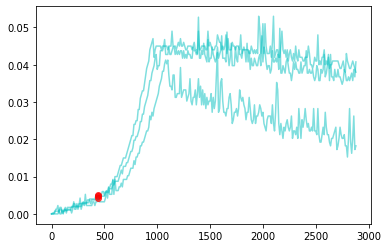

In [39]:
#visualizinglagtime
for i in Strain1_Pax: 
    plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
    plt.plot(lagtimePax1*10,Strain1_Pax[i][lagtimePax1],'ro',alpha=.7) 
    

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Growth rates Pax= [0.00015918367346938754, 0.00013316326530612256, 0.00012244897959183678]
Growth times Pax [87, 87, 96] [93, 93, 102]
Growth rates control [0.00028775510204081606, 0.00027091836734693877, 0.00027908163265306127, 0.00030714285714285696]
Growth times controls [77, 77, 77, 80] [83, 83, 83, 86]
Growth curve sig: Ttest_indResult(statistic=-11.41932901034549, pvalue=9.017033157362073e-05)


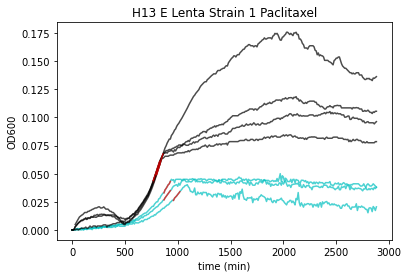

In [40]:
#Comparing drug condition to DMSO controls

MGR_Pax1_corrected=[]
MGstarttimes_Pax1_corrected=[]
MGendtimes_Pax1_corrected=[]
Strain1_Pax_update=pd.DataFrame()

MGR_controls1_corrected=[]
MGstarttimes_controls1_corrected=[]
MGendtimes_controls1_corrected=[]
Strain1_controls_update=pd.DataFrame()

for i in Strain1_Pax: 
  Strain1_Pax_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
  for a in range(0,len(Strain1_Pax)-1):
    if abs(np.diff(Strain1_Pax[i])[a]>.001):
      newdatapoint=np.average(Strain1_Pax[i][a-2:a+5])
      Strain1_Pax_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_Pax[i][a+1]
      Strain1_Pax_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_Pax_corrected, color ='c', alpha =.7)
  Strain1_Pax_update[i]=Strain1_Pax_corrected      
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_Pax_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_Pax_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_Pax_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Pax1_corrected.append(slopemax)
  MGstarttimes_Pax1_corrected.append(starttime)
  MGendtimes_Pax1_corrected.append(endtime)

for i in Strain1_controls: 
  Strain1_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain1_controls)-1):
    if abs(np.diff(Strain1_controls[i])[a]>.001):
      newdatapoint=np.average(Strain1_controls[i][a-2:a+5])
      Strain1_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain1_controls[i][a+1]
      Strain1_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain1_controls_corrected, color ='k', alpha =.7)
  Strain1_controls_update[i]=Strain1_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain1_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain1_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain1_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls1_corrected.append(slopemax)
  MGstarttimes_controls1_corrected.append(starttime)
  MGendtimes_controls1_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 1 Paclitaxel')

#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificancePax1_corrected=stats.ttest_ind(MGR_Pax1_corrected,MGR_controls1_corrected)

print('Growth rates Pax=',MGR_Pax1_corrected)
print('Growth times Pax', MGstarttimes_Pax1_corrected, MGendtimes_Pax1_corrected)
print('Growth rates control',MGR_controls1_corrected)
print('Growth times controls', MGstarttimes_controls1_corrected, MGendtimes_controls1_corrected)

print('Growth curve sig:',CurvesignificancePax1_corrected)

if CurvesignificancePax1_corrected[1]<.05:
  StrainPax1_G_Sig_corrected='Yes'
else:
  StrainPax1_G_Sig_corrected='No'

In [41]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(Strain1_Pax_update)
# Strain1_Pax_update=Strain1_Pax_update.fillna(0)

In [42]:
MaxOD_Pax1_corrected=[]
MaxOD_controls1_corrected=[]
for i in Strain1_Pax_update:
  MaxOD_Pax1_corrected.append(Strain1_Pax_update.nlargest(10,[i])[i].mean())
for i in Strain1_controls_update:
  MaxOD_controls1_corrected.append(Strain1_controls_update.nlargest(10,[i])[i].mean())

ODsignificancePax1_corrected=stats.ttest_ind(MaxOD_Pax1_corrected,MaxOD_controls1_corrected)

print('Average Max OD Pax reps 1-3:',MaxOD_Pax1_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls1_corrected)
print('OD sig:',ODsignificancePax1_corrected)


if ODsignificancePax1_corrected[1]<.05:
  StrainPax1_OD_Sig_corrected='Yes'
else:
  StrainPax1_OD_Sig_corrected='No'

Average Max OD Pax reps 1-3: [0.04677142857142856, 0.044278571428571424, 0.03805000000000001]
Average Max OD Control reps 1-3: [0.10425, 0.08405714285714286, 0.11747142857142856, 0.17506428571428573]
OD sig: Ttest_indResult(statistic=-3.3247686689111338, pvalue=0.020898566009543644)


In [43]:
# ODsignificancePax=stats.ttest_ind(FinOD_Pax,FinOD_controls)
# for i in Strain1_Pax: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain1_Pax[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain1_Pax[i])[ODstart:ODend+1],color='r')
# for i in Strain1_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain1_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain1_controls[i])[ODstart:ODend+1],color='r')


# print('Average ODs Pax=',FinOD_Pax)
# print('Average ODs Control=',FinOD_controls)
# print('OD sig:',ODsignificancePax)

In [44]:
#Calculate Half Log Phase
Strain1Pax_LagTime=lagtimePax1
Strain1Pax_Start=round(np.average(MGstarttimes_Pax1_corrected))
Strain1Pax_End=round(np.average(MGendtimes_Pax1_corrected))
Strain1Pax_MGR_Time=(Strain1Pax_End-3)
print(Strain1Pax_MGR_Time)
Strain1_Pax_HalfLogPhase=Strain1Pax_MGR_Time-Strain1Pax_LagTime
print(Strain1_Pax_HalfLogPhase)


# #Collect Data summary 
Strain1Pax_MGR=np.average(MGR_Pax1_corrected)
Strain1Pax_Growth_zstat=CurvesignificancePax1_corrected[0]
Strain1Pax_Growth_pvalue=CurvesignificancePax1_corrected[1]
Strain1Pax_OD=np.average(MaxOD_Pax1_corrected)
Strain1Pax_OD_zstat=ODsignificancePax1_corrected[0]
Strain1Pax_OD_pvalue=ODsignificancePax1_corrected[1]

Strain1Data=Strain1Data.append({'Lagtime':Strain1Pax_LagTime,\
'HalfLogTime':Strain1_Pax_HalfLogPhase, 'MGR_Time':Strain1Pax_MGR_Time,\
'Max_GR':Strain1Pax_MGR,'Growth_Z':Strain1Pax_Growth_zstat,\
'Growth_Pvalue':Strain1Pax_Growth_pvalue,'Growth Significant?': StrainPax1_G_Sig_corrected, 'Max_OD':Strain1Pax_OD,\
'OD_Z':Strain1Pax_OD_zstat,'OD_Pvalue':Strain1Pax_OD_pvalue,'OD Significant?':StrainPax1_OD_Sig_corrected},ignore_index=True)
Strain1Data=Strain1Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Vinblastine',3:'Paclitaxel'})
Strain1Data

93.0
49.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,72.0,89.0,161.0,0.000071,-22.397409,0.000003,Yes,0.034889,-3.607084,0.015428,Yes
Irinotecan,18.0,67.0,85.0,0.000188,-11.238280,0.000097,Yes,0.058722,-2.650201,0.045415,Yes
Vinblastine,50.0,34.0,84.0,0.000312,0.211412,0.840912,No,0.102800,-0.471532,0.657119,No
Paclitaxel,44.0,49.0,93.0,0.000138,-11.419329,0.000090,Yes,0.043033,-3.324769,0.020899,Yes


# Strain 2 All Samples

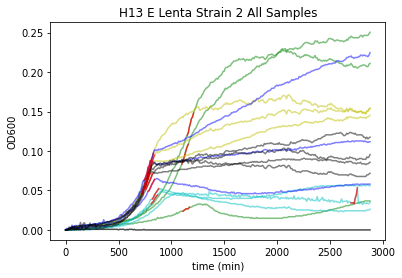

In [45]:
Strain2_FU= dfcorrected.iloc[:,24:27]
Strain2_Irino=dfcorrected.iloc[:,27:30]
Strain2_Pax=dfcorrected.iloc[:,33:36]
Strain2_Vin=dfcorrected.iloc[:,36:39]
Strain2_controls=dfcorrected.iloc[:,39:43]
MGAM_control2=dfcorrected.iloc[:,47]

for i in Strain2_FU:
    plt.plot(np.arange(0,2890,10),Strain2_FU[i], color ='g', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain2_FU[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_FU[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_FU[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain2_Irino:
    plt.plot(np.arange(0,2890,10),Strain2_Irino[i], color ='y', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6 
    for a in range(0,len(Strain2_Irino[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Irino[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Irino[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain2_Pax:
    plt.plot(np.arange(0,2890,10),Strain2_Pax[i], color ='c', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain2_Pax[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Pax[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Pax[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain2_Vin:
    plt.plot(np.arange(0,2890,10),Strain2_Vin[i], color ='b', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain2_Vin[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Vin[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Vin[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain2_controls:
    plt.plot(np.arange(0,2890,10),Strain2_controls[i], color ='k', alpha = .5)    
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain2_controls[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_controls[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_controls[i][starttime:endtime+1],color ='r', alpha = .7)
plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 2 All Samples')
plt.plot(np.arange(0,2890,10),MGAM_control2, color ='k', alpha = .7)

In [46]:
Strain2_controls.head()

,D4,D5,D6,D7
0,0.0000,0.00000,0.0000,0.00000
1,0.0000,0.00000,0.0000,0.00000
2,0.0005,0.00075,0.0000,0.00075
3,0.0015,0.00075,0.0035,0.00075
4,0.0015,0.00175,0.0035,0.00175


# Strain 2 5FU

In [47]:
#Calculate Lag Time 
lagsFU2=[]
for i in Strain2_FU:
  lagsFU2.append(next(x[0] for x in list(enumerate(Strain2_FU[i])) if x[1]>.01))
  print(lagsFU2)
lagtimeFU2=round(np.average(lagsFU2))
print(lagtimeFU2)

[74]
[74, 51]
[74, 51, 43]
56.0


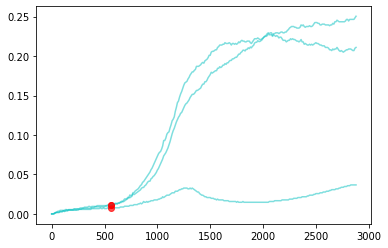

In [48]:
#visualizinglagtime
for i in Strain2_FU: 
    plt.plot(np.arange(0,2890,10),Strain2_FU[i], color ='c', alpha = .5)
    plt.plot(lagtimeFU2*10,Strain2_FU[i][lagtimeFU2],'ro',alpha=.7) 
    

Growth rates FU= [6.904761904761915e-05, 0.0004702380952380958, 0.0004273809523809527]
Growth times FU [104, 115, 110] [110, 121, 116]
Growth rates control [0.0003714285714285712, 0.0003500000000000003, 0.0003964285714285717, 0.0003023809523809523]
Growth times controls [72, 73, 74, 76] [78, 79, 80, 82]
Growth curve sig: Ttest_indResult(statistic=-0.30124889712080555, pvalue=0.7753504738359653)


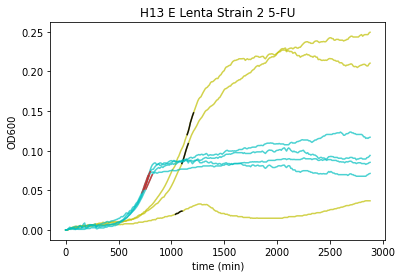

In [49]:
#Comparing drug condition to DMSO controls
#CURVE SMOOTHING 
MGR_FU2_corrected=[]
MGstarttimes_FU2_corrected=[]
MGendtimes_FU2_corrected=[]
Strain2_FU_update=pd.DataFrame()

MGR_controls2_corrected=[]
MGstarttimes_controls2_corrected=[]
MGendtimes_controls2_corrected=[]
Strain2_controls_update=pd.DataFrame()


for i in Strain2_FU:
  Strain2_FU_corrected=[0]
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_FU)-1):
    if abs(np.diff(Strain2_FU[i])[a]>.001):
      newdatapoint=np.average(Strain2_FU[i][a:a+3])
      Strain2_FU_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_FU[i][a+1]
      Strain2_FU_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_FU_corrected, color ='y', alpha =.7)
  Strain2_FU_update[i]=Strain2_FU_corrected
  #calculate corrected new max slope 
  slopemaxcorrected=0
  starttimecorrected=0
  endtimecorrected=6
  for a in range(0,len(Strain2_FU_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_FU_corrected[a:a+7])[0]
    if slope>slopemaxcorrected:
        slopemaxcorrected=slope
        starttimecorrected=a
        endtimecorrected=a+6
  plt.plot(np.arange(0,2890,10)[starttimecorrected:endtimecorrected+1],Strain2_FU_corrected[starttimecorrected:endtimecorrected+1],color ='k', alpha = .9)
  MGR_FU2_corrected.append(slopemaxcorrected)
  MGstarttimes_FU2_corrected.append(starttimecorrected)
  MGendtimes_FU2_corrected.append(endtimecorrected)
for i in Strain2_controls: 
  Strain2_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_controls)-1):
    if abs(np.diff(Strain2_controls[i])[a]>.001):
      newdatapoint=np.average(Strain2_controls[i][a:a+3])
      Strain2_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_controls[i][a+1]
      Strain2_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_controls_corrected, color ='c', alpha =.7)
  Strain2_controls_update[i]=Strain2_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls2_corrected.append(slopemax)
  MGstarttimes_controls2_corrected.append(starttime)
  MGendtimes_controls2_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 2 5-FU')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceFU2_corrected=stats.ttest_ind(MGR_FU2_corrected,MGR_controls2_corrected)

print('Growth rates FU=',MGR_FU2_corrected)
print('Growth times FU', MGstarttimes_FU2_corrected, MGendtimes_FU2_corrected)
print('Growth rates control',MGR_controls2_corrected)
print('Growth times controls', MGstarttimes_controls2_corrected, MGendtimes_controls2_corrected)

print('Growth curve sig:',CurvesignificanceFU2_corrected)

if CurvesignificanceFU2_corrected[1]<.05:
  StrainFU2_G_Sig_corrected='Yes'
else:
  StrainFU2_G_Sig_corrected='No'

In [50]:
MaxOD_FU2_corrected=[]
MaxOD_controls2_corrected=[]
for i in Strain2_FU_update:
  MaxOD_FU2_corrected.append(Strain2_FU_update.nlargest(10,[i])[i].mean())
for i in Strain2_controls_update:
  MaxOD_controls2_corrected.append(Strain2_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceFU2_corrected=stats.ttest_ind(MaxOD_FU2_corrected,MaxOD_controls2_corrected)

print('Average Max OD FU reps 1-3:',MaxOD_FU2_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls2_corrected)
print('OD sig:',ODsignificanceFU2_corrected)

if ODsignificanceFU2_corrected[1]<.05:
  StrainFU2_OD_Sig_corrected='Yes'
else:
  StrainFU2_OD_Sig_corrected='No'

Average Max OD FU reps 1-3: [0.03618333333333333, 0.22616666666666668, 0.24669999999999997]
Average Max OD Control reps 1-3: [0.12280000000000002, 0.08995, 0.1022, 0.08771666666666667]
OD sig: Ttest_indResult(statistic=1.2136460584914923, pvalue=0.27907925276393947)


In [51]:
# for i in Strain2_FU: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_FU[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_FU[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain2_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceFU2=stats.ttest_ind(FinOD_FU2,FinOD_controls2)
# print('Average ODs FU=',FinOD_FU2)
# print('Average ODs Control=',FinOD_controls2)
# print('OD sig:',ODsignificanceFU2)



In [52]:
#Calculate Half Log Phase
Strain2FU_LagTime=lagtimeFU2
Strain2FU_Start=round(np.average(MGstarttimes_FU2_corrected))
Strain2FU_End=round(np.average(MGendtimes_FU2_corrected))
Strain2FU_MGR_Time=(Strain2FU_End-3)
print(Strain2FU_MGR_Time)
Strain2_FU_HalfLogPhase=Strain2FU_MGR_Time-Strain2FU_LagTime
print(Strain2_FU_HalfLogPhase)

#Collect Data summary 
Strain2FU_MGR=np.average(MGR_FU2_corrected)
Strain2FU_Growth_zstat=CurvesignificanceFU2_corrected[0]
Strain2FU_Growth_pvalue=CurvesignificanceFU2_corrected[1]
Strain2FU_OD=np.average(MaxOD_FU2_corrected)
Strain2FU_OD_zstat=ODsignificanceFU2_corrected[0]
Strain2FU_OD_pvalue=ODsignificanceFU2_corrected[1]

Strain2Data=pd.DataFrame(columns=['Lagtime','HalfLogTime','MGR_Time',\
'Max_GR','Growth_Z','Growth_Pvalue','Growth Significant?',\
'Max_OD','OD_Z','OD_Pvalue','OD Significant?'])
Strain2Data=Strain2Data.append({'Lagtime':Strain2FU_LagTime,
'HalfLogTime':Strain2_FU_HalfLogPhase, 'MGR_Time':Strain2FU_MGR_Time,\
'Max_GR':Strain2FU_MGR,'Growth_Z':Strain2FU_Growth_zstat,\
'Growth_Pvalue':Strain2FU_Growth_pvalue,\
'Growth Significant?':StrainFU2_G_Sig_corrected,\
'Max_OD':Strain2FU_OD,'OD_Z':Strain2FU_OD_zstat,\
'OD_Pvalue':Strain2FU_OD_pvalue,'OD Significant?':StrainFU2_OD_Sig_corrected},\
ignore_index=True)
Strain2Data=Strain2Data.rename(index={0:'5-Fluorouracil'})
Strain2Data

113.0
57.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,56.0,57.0,113.0,0.000322,-0.301249,0.77535,No,0.169683,1.213646,0.279079,No


#Strain2Irino

In [53]:
#identifying lag time? 
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# (Strain2_Irino[Strain2_Irino>.107])

In [54]:
#Calculate Lag Time 
lagsIrino2=[]
for i in Strain2_Irino:
  lagsIrino2.append(next(x[0] for x in list(enumerate(Strain2_Irino[i])) if x[1]>.01))
  print(lagsIrino2)
lagtimeIrino2=round(np.average(lagsIrino2))
print(lagtimeIrino2)

[42]
[42, 41]
[42, 41, 46]
43.0


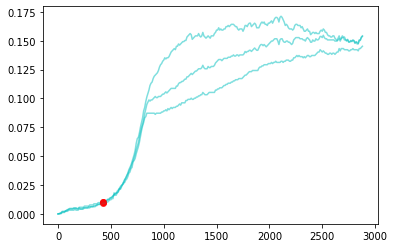

In [55]:
#visualizinglagtime
for i in Strain2_Irino: 
    plt.plot(np.arange(0,2890,10),Strain2_Irino[i], color ='c', alpha = .5)
    plt.plot(lagtimeIrino2*10,Strain2_Irino[i][lagtimeIrino2],'ro',alpha=.7) 

Growth rates Irino= [0.00041785714285714316, 0.00039999999999999996, 0.0004428571428571426]
Growth times Irino [75, 77, 77] [81, 83, 83]
Growth rates control [0.0003714285714285712, 0.0003500000000000003, 0.0003964285714285717, 0.0003023809523809523]
Growth times controls [72, 73, 74, 76] [78, 79, 80, 82]
Growth curve sig: Ttest_indResult(statistic=2.5260002838373117, pvalue=0.052786799077769446)


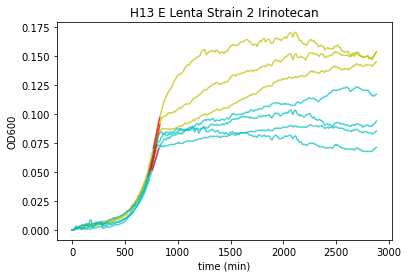

In [56]:
MGR_Irino2_corrected=[]
MGstarttimes_Irino2_corrected=[]
MGendtimes_Irino2_corrected=[]
Strain2_Irino_update=pd.DataFrame()

MGR_controls2_corrected=[]
MGstarttimes_controls2_corrected=[]
MGendtimes_controls2_corrected=[]
Strain2_controls_update=pd.DataFrame()

for i in Strain2_Irino: 
  Strain2_Irino_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain2_Irino[i], color ='c', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_Irino)-1):
    if abs(np.diff(Strain2_Irino[i])[a]>.001):
      newdatapoint=np.average(Strain2_Irino[i][a:a+3])
      Strain2_Irino_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_Irino[i][a+1]
      Strain2_Irino_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_Irino_corrected, color ='y', alpha =.7)
  Strain2_Irino_update[i]=Strain2_Irino_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_Irino_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Irino_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Irino_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Irino2_corrected.append(slopemax)
  MGstarttimes_Irino2_corrected.append(starttime)
  MGendtimes_Irino2_corrected.append(endtime)

for i in Strain2_controls: 
  Strain2_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_controls)-1):
    if abs(np.diff(Strain2_controls[i])[a]>.001):
      newdatapoint=np.average(Strain2_controls[i][a:a+3])
      Strain2_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_controls[i][a+1]
      Strain2_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_controls_corrected, color ='c', alpha =.7)
  Strain2_controls_update[i]=Strain2_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls2_corrected.append(slopemax)
  MGstarttimes_controls2_corrected.append(starttime)
  MGendtimes_controls2_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 2 Irinotecan')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceIrino2_corrected=stats.ttest_ind(MGR_Irino2_corrected,MGR_controls2_corrected)

print('Growth rates Irino=',MGR_Irino2_corrected)
print('Growth times Irino', MGstarttimes_Irino2_corrected, MGendtimes_Irino2_corrected)
print('Growth rates control',MGR_controls2_corrected)
print('Growth times controls', MGstarttimes_controls2_corrected, MGendtimes_controls2_corrected)

print('Growth curve sig:',CurvesignificanceIrino2_corrected)

if CurvesignificanceIrino2_corrected[1]<.05:
  StrainIrino2_G_Sig_corrected='Yes'
else:
  StrainIrino2_G_Sig_corrected='No'

In [57]:
MaxOD_Irino2_corrected=[]
MaxOD_controls2_corrected=[]
for i in Strain2_Irino_update:
  MaxOD_Irino2_corrected.append(Strain2_Irino_update.nlargest(10,[i])[i].mean())
for i in Strain2_controls_update:
  MaxOD_controls2_corrected.append(Strain2_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceIrino2_corrected=stats.ttest_ind(MaxOD_Irino2_corrected,MaxOD_controls2_corrected)

print('Average Max OD Irino reps 1-3:',MaxOD_Irino2_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls2_corrected)
print('OD sig:',ODsignificanceIrino2_corrected)

if ODsignificanceIrino2_corrected[1]<.05:
  StrainIrino2_OD_Sig_corrected='Yes'
else:
  StrainIrino2_OD_Sig_corrected='No'


Average Max OD Irino reps 1-3: [0.14314999999999997, 0.15299999999999997, 0.16901666666666665]
Average Max OD Control reps 1-3: [0.12280000000000002, 0.08995, 0.1022, 0.08771666666666667]
OD sig: Ttest_indResult(statistic=4.7672711197197275, pvalue=0.005026937942721512)


In [58]:
# for i in Strain2_Irino: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_Irino[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_Irino[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain2_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceIrino2=stats.ttest_ind(FinOD_Irino2,FinOD_controls2)
# print('Average ODs Irino=',FinOD_Irino2)
# print('Average ODs Control=',FinOD_controls2)
# print('OD sig:',ODsignificanceIrino2)

In [59]:
#Calculate Half Log Phase
Strain2Irino_LagTime=lagtimeIrino2
Strain2Irino_Start=round(np.average(MGstarttimes_Irino2_corrected))
Strain2Irino_End=round(np.average(MGendtimes_Irino2_corrected))
Strain2Irino_MGR_Time=(Strain2Irino_End-3)
print(Strain2Irino_MGR_Time)
Strain2_Irino_HalfLogPhase=Strain2Irino_MGR_Time-Strain2Irino_LagTime
print(Strain2_Irino_HalfLogPhase)

#Collect Data summary 
Strain2Irino_MGR=np.average(MGR_Irino2_corrected)
Strain2Irino_Growth_zstat=CurvesignificanceIrino2_corrected[0]
Strain2Irino_Growth_pvalue=CurvesignificanceIrino2_corrected[1]
Strain2Irino_OD=np.average(MaxOD_Irino2_corrected)
Strain2Irino_OD_zstat=ODsignificanceIrino2_corrected[0]
Strain2Irino_OD_pvalue=ODsignificanceIrino2_corrected[1]


Strain2Data=Strain2Data.append({'Lagtime':Strain2Irino_LagTime,
'HalfLogTime':Strain2_Irino_HalfLogPhase, 'MGR_Time':Strain2Irino_MGR_Time,\
'Max_GR':Strain2Irino_MGR,'Growth_Z':Strain2Irino_Growth_zstat,\
'Growth_Pvalue':Strain2Irino_Growth_pvalue,\
'Growth Significant?':StrainIrino2_G_Sig_corrected,\
'Max_OD':Strain2Irino_OD,'OD_Z':Strain2Irino_OD_zstat,\
'OD_Pvalue':Strain2Irino_OD_pvalue,'OD Significant?':StrainIrino2_OD_Sig_corrected},\
ignore_index=True)
Strain2Data=Strain2Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan'})
Strain2Data

79.0
36.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,56.0,57.0,113.0,0.000322,-0.301249,0.775350,No,0.169683,1.213646,0.279079,No
Irinotecan,43.0,36.0,79.0,0.000420,2.526000,0.052787,No,0.155056,4.767271,0.005027,Yes


#Strain 2 Pax

In [60]:
#(Strain2_Pax[Strain2_Pax>.107])

In [61]:
#Calculate Lag Time 
lagsPax2=[]
for i in Strain2_Pax:
  lagsPax2.append(next(x[0] for x in list(enumerate(Strain2_Pax[i])) if x[1]>.005))
  print(lagsPax2)
lagtimePax2=round(np.average(lagsPax2))
print(lagtimePax2)

[45]
[45, 41]
[45, 41, 39]
42.0


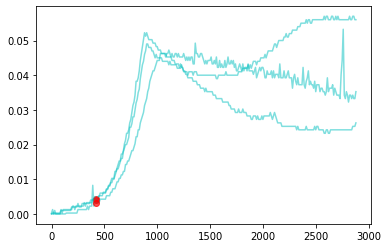

In [62]:
#visualizinglagtime
for i in Strain2_Pax: 
    plt.plot(np.arange(0,2890,10),Strain2_Pax[i], color ='c', alpha = .5)
    plt.plot(lagtimePax2*10,Strain2_Pax[i][lagtimePax2],'ro',alpha=.7) 

Growth rates Pax= [0.00018928571428571413, 0.00018010204081632655, 0.00013469387755102056]
Growth times Pax [79, 81, 87] [85, 87, 93]
Growth rates control [0.0003581632653061224, 0.0003280612244897956, 0.0003806122448979595, 0.0002938775510204081]
Growth times controls [72, 72, 74, 74] [78, 78, 80, 80]
Growth curve sig: Ttest_indResult(statistic=-6.529722843623165, pvalue=0.0012602382153896314)


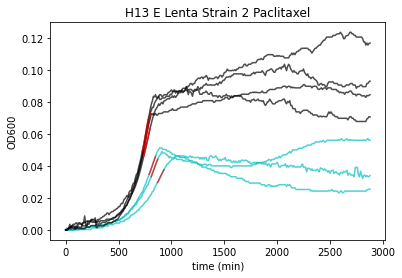

In [63]:
#FLAG for curve smoothing
#Comparing drug condition to DMSO controls

MGR_Pax2_corrected=[]
MGstarttimes_Pax2_corrected=[]
MGendtimes_Pax2_corrected=[]
Strain2_Pax_update=pd.DataFrame()

MGR_controls2_corrected=[]
MGstarttimes_controls2_corrected=[]
MGendtimes_controls2_corrected=[]
Strain2_controls_update=pd.DataFrame()

for i in Strain2_Pax: 
  Strain2_Pax_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
  for a in range(0,len(Strain2_Pax)-1):
    if abs(np.diff(Strain2_Pax[i])[a]>.001):
      newdatapoint=np.average(Strain2_Pax[i][a-2:a+5])
      Strain2_Pax_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_Pax[i][a+1]
      Strain2_Pax_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_Pax_corrected, color ='c', alpha =.7)
  Strain2_Pax_update[i]=Strain2_Pax_corrected      
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_Pax_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Pax_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Pax_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Pax2_corrected.append(slopemax)
  MGstarttimes_Pax2_corrected.append(starttime)
  MGendtimes_Pax2_corrected.append(endtime)
  
for i in Strain2_controls: 
  Strain2_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_controls)-1):
    if abs(np.diff(Strain2_controls[i])[a]>.001):
      newdatapoint=np.average(Strain2_controls[i][a-2:a+5])
      Strain2_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_controls[i][a+1]
      Strain2_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_controls_corrected, color ='k', alpha =.7)
  Strain2_controls_update[i]=Strain2_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls2_corrected.append(slopemax)
  MGstarttimes_controls2_corrected.append(starttime)
  MGendtimes_controls2_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 2 Paclitaxel')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificancePax2_corrected=stats.ttest_ind(MGR_Pax2_corrected,MGR_controls2_corrected)

print('Growth rates Pax=',MGR_Pax2_corrected)
print('Growth times Pax', MGstarttimes_Pax2_corrected, MGendtimes_Pax2_corrected)
print('Growth rates control',MGR_controls2_corrected)
print('Growth times controls', MGstarttimes_controls2_corrected, MGendtimes_controls2_corrected)

print('Growth curve sig:',CurvesignificancePax2_corrected)

if CurvesignificancePax2_corrected[1]<.05:
  StrainPax2_G_Sig_corrected='Yes'
else:
  StrainPax2_G_Sig_corrected='No'

In [64]:
MaxOD_Pax2_corrected=[]
MaxOD_controls2_corrected=[]
for i in Strain2_Pax_update:
  MaxOD_Pax2_corrected.append(Strain2_Pax_update.nlargest(10,[i])[i].mean())
for i in Strain2_controls_update:
  MaxOD_controls2_corrected.append(Strain2_controls_update.nlargest(10,[i])[i].mean())

ODsignificancePax2_corrected=stats.ttest_ind(MaxOD_Pax2_corrected,MaxOD_controls2_corrected)

print('Average Max OD Pax reps 1-3:',MaxOD_Pax2_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls2_corrected)
print('OD sig:',ODsignificancePax2_corrected)

if ODsignificancePax2_corrected[1]<.05:
  StrainPax2_OD_Sig_corrected='Yes'
else:
  StrainPax2_OD_Sig_corrected='No'

Average Max OD Pax reps 1-3: [0.050335714285714296, 0.05655714285714286, 0.04624999999999999]
Average Max OD Control reps 1-3: [0.1227857142857143, 0.08995, 0.10200000000000001, 0.08762142857142857]
OD sig: Ttest_indResult(statistic=-5.034793896174607, pvalue=0.003984519641411483)


In [65]:
#Calculate Half Log Phase
Strain2Pax_LagTime=lagtimePax2
Strain2Pax_Start=round(np.average(MGstarttimes_Pax2_corrected))
Strain2Pax_End=round(np.average(MGendtimes_Pax2_corrected))
Strain2Pax_MGR_Time=(Strain2Pax_End-3)
print(Strain2Pax_MGR_Time)
Strain2_Pax_HalfLogPhase=Strain2Pax_MGR_Time-Strain2Pax_LagTime
print(Strain2_Pax_HalfLogPhase)

#Collect Data summary 
Strain2Pax_MGR=np.average(MGR_Pax2_corrected)
Strain2Pax_Growth_zstat=CurvesignificancePax2_corrected[0]
Strain2Pax_Growth_pvalue=CurvesignificancePax2_corrected[1]
Strain2Pax_OD=np.average(MaxOD_Pax2_corrected)
Strain2Pax_OD_zstat=ODsignificancePax2_corrected[0]
Strain2Pax_OD_pvalue=ODsignificancePax2_corrected[1]


Strain2Data=Strain2Data.append({'Lagtime':Strain2Pax_LagTime,
'HalfLogTime':Strain2_Pax_HalfLogPhase, 'MGR_Time':Strain2Pax_MGR_Time,\
'Max_GR':Strain2Pax_MGR,'Growth_Z':Strain2Pax_Growth_zstat,\
'Growth_Pvalue':Strain2Pax_Growth_pvalue,\
'Growth Significant?':StrainPax2_G_Sig_corrected,\
'Max_OD':Strain2Pax_OD,'OD_Z':Strain2Pax_OD_zstat,\
'OD_Pvalue':Strain2Pax_OD_pvalue,'OD Significant?':StrainPax2_OD_Sig_corrected},\
ignore_index=True)
Strain2Data=Strain2Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel'})
Strain2Data

85.0
43.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,56.0,57.0,113.0,0.000322,-0.301249,0.775350,No,0.169683,1.213646,0.279079,No
Irinotecan,43.0,36.0,79.0,0.000420,2.526000,0.052787,No,0.155056,4.767271,0.005027,Yes
Paclitaxel,42.0,43.0,85.0,0.000168,-6.529723,0.001260,Yes,0.051048,-5.034794,0.003985,Yes


#Strain 2 Vinblastine

In [66]:
#(Strain2_Vin[Strain2_Vin>.107])

In [67]:
#Calculate Lag Time 
lagsVin2=[]
for i in Strain2_Vin:
  lagsVin2.append(next(x[0] for x in list(enumerate(Strain2_Vin[i])) if x[1]>.01))
  print(lagsVin2)
lagtimeVin2=round(np.average(lagsVin2))
print(lagtimeVin2)

[36]
[36, 40]
[36, 40, 48]
41.0


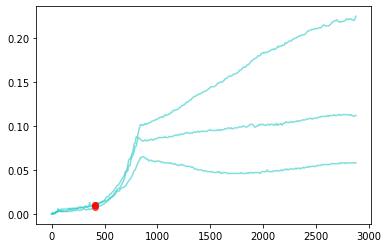

In [68]:
#visualizinglagtime
for i in Strain2_Vin: 
    plt.plot(np.arange(0,2890,10),Strain2_Vin[i], color ='c', alpha = .5)
    plt.plot(lagtimeVin2*10,Strain2_Vin[i][lagtimeVin2],'ro',alpha=.7) 

Growth rates Vin= [0.0002571428571428573, 0.00038809523809523805, 0.00037976190476190466]
Growth times Vin [77, 78, 73] [83, 84, 79]
Growth rates control [0.0003714285714285712, 0.0003500000000000003, 0.0003964285714285717, 0.0003023809523809523]
Growth times controls [72, 73, 74, 76] [78, 79, 80, 82]
Growth curve sig: Ttest_indResult(statistic=-0.3146289043030955, pvalue=0.7657489801084819)


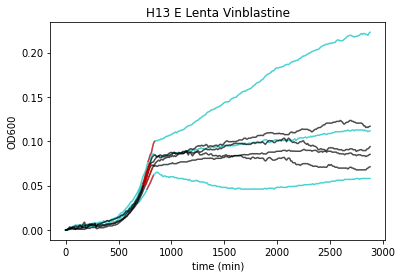

In [69]:
#Comparing drug condition to DMSO controls

MGR_Vin2_corrected=[]
MGstarttimes_Vin2_corrected=[]
MGendtimes_Vin2_corrected=[]
Strain2_Vin_update=pd.DataFrame()

MGR_controls2_corrected=[]
MGstarttimes_controls2_corrected=[]
MGendtimes_controls2_corrected=[]
Strain2_controls_update=pd.DataFrame()

for i in Strain2_Vin: 
  #plt.plot(np.arange(0,2890,10),Strain2_Vin[i], color ='c', alpha = .5)
  Strain2_Vin_corrected=[0]
  for a in range(0,len(Strain2_Vin)-1):
    if abs(np.diff(Strain2_Vin[i])[a]>.001):
      newdatapoint=np.average(Strain2_Vin[i][a:a+3])
      Strain2_Vin_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_Vin[i][a+1]
      Strain2_Vin_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_Vin_corrected, color ='c', alpha =.7)
  Strain2_Vin_update[i]=Strain2_Vin_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_Vin_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_Vin_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_Vin_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Vin2_corrected.append(slopemax)
  MGstarttimes_Vin2_corrected.append(starttime)
  MGendtimes_Vin2_corrected.append(endtime)

for i in Strain2_controls: 
  Strain2_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain2_controls)-1):
    if abs(np.diff(Strain2_controls[i])[a]>.001):
      newdatapoint=np.average(Strain2_controls[i][a:a+3])
      Strain2_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain2_controls[i][a+1]
      Strain2_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain2_controls_corrected, color ='k', alpha =.7)
  Strain2_controls_update[i]=Strain2_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain2_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain2_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain2_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls2_corrected.append(slopemax)
  MGstarttimes_controls2_corrected.append(starttime)
  MGendtimes_controls2_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Vinblastine')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceVin2_corrected=stats.ttest_ind(MGR_Vin2_corrected,MGR_controls2_corrected)

print('Growth rates Vin=',MGR_Vin2_corrected)
print('Growth times Vin', MGstarttimes_Vin2_corrected, MGendtimes_Vin2_corrected)
print('Growth rates control',MGR_controls2_corrected)
print('Growth times controls', MGstarttimes_controls2_corrected, MGendtimes_controls2_corrected)

print('Growth curve sig:',CurvesignificanceVin2_corrected)

if CurvesignificanceVin2_corrected[1]<.05:
  StrainVin2_G_Sig_corrected='Yes'
else:
  StrainVin2_G_Sig_corrected='No'

In [70]:
MaxOD_Vin2_corrected=[]
MaxOD_controls2_corrected=[]
for i in Strain2_Vin_update:
  MaxOD_Vin2_corrected.append(Strain2_Vin_update.nlargest(10,[i])[i].mean())
for i in Strain2_controls:
  MaxOD_controls2_corrected.append(Strain2_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceVin2_corrected=stats.ttest_ind(MaxOD_Vin2_corrected,MaxOD_controls2_corrected)

print('Average Max OD Vin reps 1-3:',MaxOD_Vin2_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls2_corrected)
print('OD sig:',ODsignificanceVin2_corrected)

if ODsignificanceVin2_corrected[1]<.05:
  StrainVin2_OD_Sig_corrected='Yes'
else:
  StrainVin2_OD_Sig_corrected='No'

Average Max OD Vin reps 1-3: [0.06303333333333334, 0.22111666666666657, 0.11274999999999998]
Average Max OD Control reps 1-3: [0.12280000000000002, 0.08995, 0.1022, 0.08771666666666667]
OD sig: Ttest_indResult(statistic=0.7871407430924062, pvalue=0.4668535166749685)


In [71]:
#Calculate Half Log Phase
Strain2Vin_LagTime=lagtimeVin2
Strain2Vin_Start=round(np.average(MGstarttimes_Vin2_corrected))
Strain2Vin_End=round(np.average(MGendtimes_Vin2_corrected))
Strain2Vin_MGR_Time=(Strain2Vin_End-3)
print(Strain2Vin_MGR_Time)
Strain2_Vin_HalfLogPhase=Strain2Vin_MGR_Time-Strain2Vin_LagTime
print(Strain2_Vin_HalfLogPhase)

#Collect Data summary 
Strain2Vin_MGR=np.average(MGR_Vin2_corrected)
Strain2Vin_Growth_zstat=CurvesignificanceVin2_corrected[0]
Strain2Vin_Growth_pvalue=CurvesignificanceVin2_corrected[1]
Strain2Vin_OD=np.average(MaxOD_Vin2_corrected)
Strain2Vin_OD_zstat=ODsignificanceVin2_corrected[0]
Strain2Vin_OD_pvalue=ODsignificanceVin2_corrected[1]


Strain2Data=Strain2Data.append({'Lagtime':Strain2Vin_LagTime,
'HalfLogTime':Strain2_Vin_HalfLogPhase, 'MGR_Time':Strain2Vin_MGR_Time,\
'Max_GR':Strain2Vin_MGR,'Growth_Z':Strain2Vin_Growth_zstat,\
'Growth_Pvalue':Strain2Vin_Growth_pvalue,\
'Growth Significant?':StrainVin2_G_Sig_corrected,\
'Max_OD':Strain2Vin_OD,'OD_Z':Strain2Vin_OD_zstat,\
'OD_Pvalue':Strain2Vin_OD_pvalue,'OD Significant?':StrainVin2_OD_Sig_corrected},\
ignore_index=True)
Strain2Data=Strain2Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel',3:'Vinblastine'})
Strain2Data

79.0
38.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,56.0,57.0,113.0,0.000322,-0.301249,0.775350,No,0.169683,1.213646,0.279079,No
Irinotecan,43.0,36.0,79.0,0.000420,2.526000,0.052787,No,0.155056,4.767271,0.005027,Yes
Paclitaxel,42.0,43.0,85.0,0.000168,-6.529723,0.001260,Yes,0.051048,-5.034794,0.003985,Yes
Vinblastine,41.0,38.0,79.0,0.000342,-0.314629,0.765749,No,0.132300,0.787141,0.466854,No


In [72]:
# for i in Strain2_Vin: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_Vin[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_Vin[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain2_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain2_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain2_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceVin2=stats.ttest_ind(FinOD_Vin2,FinOD_controls2)
# print('Average ODs Vin=',FinOD_Vin2)
# print('Average ODs Control=',FinOD_controls2)
# print('OD sig:',ODsignificanceVin2)

# Strain 3 All Samples


Text(0.5, 1.0, 'H13 E Lenta Strain 3 All Samples')

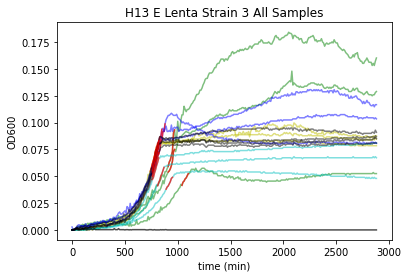

In [73]:
Strain3_FU= dfcorrected.iloc[:,48:51]
Strain3_Irino=dfcorrected.iloc[:,51:54]
Strain3_Pax=dfcorrected.iloc[:,57:60]
Strain3_Vin=dfcorrected.iloc[:,60:63]
Strain3_controls=dfcorrected.iloc[:,63:67]
MGAM_control3=dfcorrected.iloc[:,71]

for i in Strain3_FU:
    plt.plot(np.arange(0,2890,10),Strain3_FU[i], color ='g', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain3_FU[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_FU[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_FU[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain3_Irino:
    plt.plot(np.arange(0,2890,10),Strain3_Irino[i], color ='y', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain3_Irino[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Irino[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Irino[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain3_Pax:     
    plt.plot(np.arange(0,2890,10),Strain3_Pax[i], color ='c', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain3_Pax[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Pax[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Pax[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain3_Vin:
    plt.plot(np.arange(0,2890,10),Strain3_Vin[i], color ='b', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain3_Vin[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Vin[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Vin[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain3_controls:
    plt.plot(np.arange(0,2890,10),Strain3_controls[i], color ='k', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6     
    for a in range(0,len(Strain3_controls[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_controls[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_controls[i][starttime:endtime+1],color ='r', alpha = .7)
plt.plot(np.arange(0,2890,10),MGAM_control3, color ='k', alpha = .7)
plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 3 All Samples')

#Strain3 FU

In [74]:
#(Strain3_FU[Strain3_FU>.107])

In [75]:
#Calculate Lag Time 
lagsFU3=[]
for i in Strain3_FU:
  lagsFU3.append(next(x[0] for x in list(enumerate(Strain3_FU[i])) if x[1]>.01))
  print(lagsFU3)
lagtimeFU3=round(np.average(lagsFU3))
print(lagtimeFU3)

[72]
[72, 37]
[72, 37, 52]
54.0


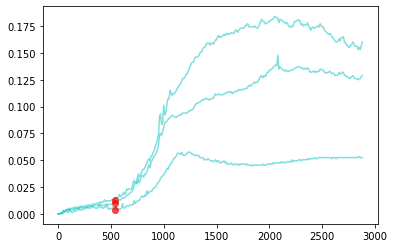

In [76]:
#visualizinglagtime
for i in Strain3_FU: 
    plt.plot(np.arange(0,2890,10),Strain3_FU[i], color ='c', alpha = .5)
    plt.plot(lagtimeFU3*10,Strain3_FU[i][lagtimeFU3],'ro',alpha=.7) 
    

Growth rates FU= [0.00016904761904761926, 0.0005166666666666668, 0.0003559523809523812]
Growth times FU [104, 91, 91] [110, 97, 97]
Growth rates control [0.00039642857142857166, 0.000398809523809524, 0.0004142857142857144, 0.00035595238095238095]
Growth times controls [76, 76, 75, 76] [82, 82, 81, 82]
Growth curve sig: Ttest_indResult(statistic=-0.5174324158006174, pvalue=0.6269233947416493)


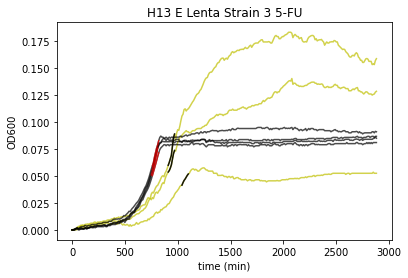

In [77]:
#Comparing drug condition to DMSO controls
#CURVE SMOOTHING 
MGR_FU3_corrected=[]
MGstarttimes_FU3_corrected=[]
MGendtimes_FU3_corrected=[]
Strain3_FU_update=pd.DataFrame()

MGR_controls3_corrected=[]
MGstarttimes_controls3_corrected=[]
MGendtimes_controls3_corrected=[]
Strain3_controls_update=pd.DataFrame()


for i in Strain3_FU:
  Strain3_FU_corrected=[0]
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_FU)-1):
    if abs(np.diff(Strain3_FU[i])[a]>.001):
      newdatapoint=np.average(Strain3_FU[i][a:a+3])
      Strain3_FU_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_FU[i][a+1]
      Strain3_FU_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_FU_corrected, color ='y', alpha =.7)
  Strain3_FU_update[i]=Strain3_FU_corrected
  #calculate corrected new max slope 
  slopemaxcorrected=0
  starttimecorrected=0
  endtimecorrected=6
  for a in range(0,len(Strain3_FU_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_FU_corrected[a:a+7])[0]
    if slope>slopemaxcorrected:
        slopemaxcorrected=slope
        starttimecorrected=a
        endtimecorrected=a+6
  plt.plot(np.arange(0,2890,10)[starttimecorrected:endtimecorrected+1],Strain3_FU_corrected[starttimecorrected:endtimecorrected+1],color ='k', alpha = .9)
  MGR_FU3_corrected.append(slopemaxcorrected)
  MGstarttimes_FU3_corrected.append(starttimecorrected)
  MGendtimes_FU3_corrected.append(endtimecorrected)
for i in Strain3_controls: 
  Strain3_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_controls)-1):
    if abs(np.diff(Strain3_controls[i])[a]>.001):
      newdatapoint=np.average(Strain3_controls[i][a:a+3])
      Strain3_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_controls[i][a+1]
      Strain3_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_controls_corrected, color ='k', alpha =.7)
  Strain3_controls_update[i]=Strain3_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls3_corrected.append(slopemax)
  MGstarttimes_controls3_corrected.append(starttime)
  MGendtimes_controls3_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 3 5-FU')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceFU3_corrected=stats.ttest_ind(MGR_FU3_corrected,MGR_controls3_corrected)

print('Growth rates FU=',MGR_FU3_corrected)
print('Growth times FU', MGstarttimes_FU3_corrected, MGendtimes_FU3_corrected)
print('Growth rates control',MGR_controls3_corrected)
print('Growth times controls', MGstarttimes_controls3_corrected, MGendtimes_controls3_corrected)

print('Growth curve sig:',CurvesignificanceFU3_corrected)

if CurvesignificanceFU3_corrected[1]<.05:
  StrainFU3_G_Sig_corrected='Yes'
else:
  StrainFU3_G_Sig_corrected='No'

In [78]:
MaxOD_FU3_corrected=[]
MaxOD_controls3_corrected=[]
for i in Strain3_FU_update:
  MaxOD_FU3_corrected.append(Strain3_FU_update.nlargest(10,[i])[i].mean())
for i in Strain3_controls_update:
  MaxOD_controls3_corrected.append(Strain3_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceFU3_corrected=stats.ttest_ind(MaxOD_FU3_corrected,MaxOD_controls3_corrected)

print('Average Max OD FU reps 1-3:',MaxOD_FU3_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls3_corrected)
print('OD sig:',ODsignificanceFU3_corrected)

if ODsignificanceFU3_corrected[1]<.05:
  StrainFU3_OD_Sig_corrected='Yes'
else:
  StrainFU3_OD_Sig_corrected='No'

Average Max OD FU reps 1-3: [0.05656666666666667, 0.18181666666666665, 0.13753333333333334]
Average Max OD Control reps 1-3: [0.09496666666666666, 0.08665000000000002, 0.08463333333333332, 0.08099999999999996]
OD sig: Ttest_indResult(statistic=1.2465661337780443, pvalue=0.26777154040579115)


In [79]:
# for i in Strain3_FU: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_FU[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_FU[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain3_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceFU3=stats.ttest_ind(FinOD_FU3,FinOD_controls3)
# print('Average ODs FU=',FinOD_FU3)
# print('Average ODs Control=',FinOD_controls3)
# print('OD sig:',ODsignificanceFU3)


In [80]:
#Calculate Half Log Phase
Strain3FU_LagTime=lagtimeFU3
Strain3FU_Start=round(np.average(MGstarttimes_FU3_corrected))
Strain3FU_End=round(np.average(MGendtimes_FU3_corrected))
Strain3FU_MGR_Time=(Strain3FU_End-3)
print(Strain3FU_MGR_Time)
Strain3_FU_HalfLogPhase=Strain3FU_MGR_Time-Strain3FU_LagTime
print(Strain3_FU_HalfLogPhase)

#Collect Data summary 
Strain3FU_MGR=np.average(MGR_FU3_corrected)
Strain3FU_Growth_zstat=CurvesignificanceFU3_corrected[0]
Strain3FU_Growth_pvalue=CurvesignificanceFU3_corrected[1]
Strain3FU_OD=np.average(MaxOD_FU3_corrected)
Strain3FU_OD_zstat=ODsignificanceFU3_corrected[0]
Strain3FU_OD_pvalue=ODsignificanceFU3_corrected[1]

Strain3Data=pd.DataFrame(columns=['Lagtime','HalfLogTime','MGR_Time',\
'Max_GR','Growth_Z','Growth_Pvalue','Growth Significant?',\
'Max_OD','OD_Z','OD_Pvalue','OD Significant?'])
Strain3Data=Strain3Data.append({'Lagtime':Strain3FU_LagTime,
'HalfLogTime':Strain3_FU_HalfLogPhase, 'MGR_Time':Strain3FU_MGR_Time,\
'Max_GR':Strain3FU_MGR,'Growth_Z':Strain3FU_Growth_zstat,\
'Growth_Pvalue':Strain3FU_Growth_pvalue,\
'Growth Significant?':StrainFU3_G_Sig_corrected,\
'Max_OD':Strain3FU_OD,'OD_Z':Strain3FU_OD_zstat,\
'OD_Pvalue':Strain3FU_OD_pvalue,'OD Significant?':StrainFU3_OD_Sig_corrected},\
ignore_index=True)
Strain3Data=Strain3Data.rename(index={0:'5-Fluorouracil'})
Strain3Data

98.0
44.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,54.0,44.0,98.0,0.000347,-0.517432,0.626923,No,0.125306,1.246566,0.267772,No


#Strain 3 Irinotecan

In [81]:
#Calculate Lag Time 
lagsIrino3=[]
for i in Strain3_Irino:
  lagsIrino3.append(next(x[0] for x in list(enumerate(Strain3_Irino[i])) if x[1]>.01))
  print(lagsIrino3)
lagtimeIrino3=round(np.average(lagsIrino3))
print(lagtimeIrino3)

[47]
[47, 50]
[47, 50, 54]
50.0


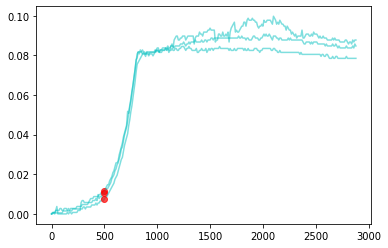

In [82]:
#visualizinglagtime
for i in Strain3_Irino: 
    plt.plot(np.arange(0,2890,10),Strain3_Irino[i], color ='c', alpha = .5)
    plt.plot(lagtimeIrino3*10,Strain3_Irino[i][lagtimeIrino3],'ro',alpha=.7) 


In [83]:
# (Strain3_Irino[Strain3_Irino>.107])

Growth rates Irino= [0.0003690476190476191, 0.0003869047619047617, 0.00039642857142857145]
Growth times Irino [74, 74, 75] [80, 80, 81]
Growth rates control [0.00039642857142857166, 0.000398809523809524, 0.0004142857142857144, 0.00035595238095238095]
Growth times controls [76, 76, 75, 76] [82, 82, 81, 82]
Growth curve sig: Ttest_indResult(statistic=-0.4472975398640083, pvalue=0.6733717795294027)


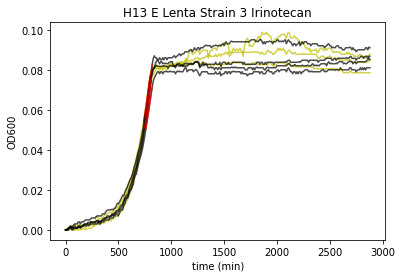

In [84]:
#Comparing drug condition to DMSO controls

MGR_Irino3_corrected=[]
MGstarttimes_Irino3_corrected=[]
MGendtimes_Irino3_corrected=[]
Strain3_Irino_update=pd.DataFrame()

MGR_controls3_corrected=[]
MGstarttimes_controls3_corrected=[]
MGendtimes_controls3_corrected=[]
Strain3_controls_update=pd.DataFrame()

for i in Strain3_Irino: 
  Strain3_Irino_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain2_Irino[i], color ='c', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_Irino)-1):
    if abs(np.diff(Strain3_Irino[i])[a]>.001):
      newdatapoint=np.average(Strain3_Irino[i][a:a+3])
      Strain3_Irino_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_Irino[i][a+1]
      Strain3_Irino_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_Irino_corrected, color ='y', alpha =.7)
  Strain3_Irino_update[i]=Strain3_Irino_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_Irino_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Irino_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Irino_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Irino3_corrected.append(slopemax)
  MGstarttimes_Irino3_corrected.append(starttime)
  MGendtimes_Irino3_corrected.append(endtime)

for i in Strain3_controls: 
  Strain3_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_controls)-1):
    if abs(np.diff(Strain3_controls[i])[a]>.001):
      newdatapoint=np.average(Strain3_controls[i][a:a+3])
      Strain3_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_controls[i][a+1]
      Strain3_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_controls_corrected, color ='k', alpha =.7)
  Strain3_controls_update[i]=Strain3_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls3_corrected.append(slopemax)
  MGstarttimes_controls3_corrected.append(starttime)
  MGendtimes_controls3_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 3 Irinotecan')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceIrino3_corrected=stats.ttest_ind(MGR_Irino3_corrected,MGR_controls3_corrected)

print('Growth rates Irino=',MGR_Irino3_corrected)
print('Growth times Irino', MGstarttimes_Irino3_corrected, MGendtimes_Irino3_corrected)
print('Growth rates control',MGR_controls3_corrected)
print('Growth times controls', MGstarttimes_controls3_corrected, MGendtimes_controls3_corrected)

print('Growth curve sig:',CurvesignificanceIrino3_corrected)

if CurvesignificanceIrino3_corrected[1]<.05:
  StrainIrino3_G_Sig_corrected='Yes'
else:
  StrainIrino3_G_Sig_corrected='No'

In [85]:
MaxOD_Irino3_corrected=[]
MaxOD_controls3_corrected=[]
for i in Strain3_Irino_update:
  MaxOD_Irino3_corrected.append(Strain3_Irino_update.nlargest(10,[i])[i].mean())
for i in Strain3_controls_update:
  MaxOD_controls3_corrected.append(Strain3_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceIrino3_corrected=stats.ttest_ind(MaxOD_Irino3_corrected,MaxOD_controls3_corrected)

print('Average Max OD Irino reps 1-3:',MaxOD_Irino3_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls3_corrected)
print('OD sig:',ODsignificanceIrino3_corrected)

if ODsignificanceIrino3_corrected[1]<.05:
  StrainIrino3_OD_Sig_corrected='Yes'
else:
  StrainIrino3_OD_Sig_corrected='No'

Average Max OD Irino reps 1-3: [0.09808333333333333, 0.09004999999999999, 0.08383333333333334]
Average Max OD Control reps 1-3: [0.09496666666666666, 0.08665000000000002, 0.08463333333333332, 0.08099999999999996]
OD sig: Ttest_indResult(statistic=0.7817710888709114, pvalue=0.4697314765435614)


In [86]:
#Calculate Half Log Phase
Strain3Irino_LagTime=lagtimeIrino3
Strain3Irino_Start=round(np.average(MGstarttimes_Irino3_corrected))
Strain3Irino_End=round(np.average(MGendtimes_Irino3_corrected))
Strain3Irino_MGR_Time=(Strain3Irino_End-3)
print(Strain3Irino_MGR_Time)
Strain3_Irino_HalfLogPhase=Strain3Irino_MGR_Time-Strain3Irino_LagTime
print(Strain3_Irino_HalfLogPhase)

#Collect Data summary 
Strain3Irino_MGR=np.average(MGR_Irino3_corrected)
Strain3Irino_Growth_zstat=CurvesignificanceIrino3_corrected[0]
Strain3Irino_Growth_pvalue=CurvesignificanceIrino3_corrected[1]
Strain3Irino_OD=np.average(MaxOD_Irino3_corrected)
Strain3Irino_OD_zstat=ODsignificanceIrino3_corrected[0]
Strain3Irino_OD_pvalue=ODsignificanceIrino3_corrected[1]

Strain3Data=Strain3Data.append({'Lagtime':Strain3Irino_LagTime,
'HalfLogTime':Strain3_Irino_HalfLogPhase, 'MGR_Time':Strain3Irino_MGR_Time,\
'Max_GR':Strain3Irino_MGR,'Growth_Z':Strain3Irino_Growth_zstat,\
'Growth_Pvalue':Strain3Irino_Growth_pvalue,\
'Growth Significant?':StrainIrino3_G_Sig_corrected,\
'Max_OD':Strain3Irino_OD,'OD_Z':Strain3Irino_OD_zstat,\
'OD_Pvalue':Strain3Irino_OD_pvalue,'OD Significant?':StrainIrino3_OD_Sig_corrected},\
ignore_index=True)
Strain3Data=Strain3Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan'})
Strain3Data

77.0
27.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,54.0,44.0,98.0,0.000347,-0.517432,0.626923,No,0.125306,1.246566,0.267772,No
Irinotecan,50.0,27.0,77.0,0.000384,-0.447298,0.673372,No,0.090656,0.781771,0.469731,No


In [87]:
# for i in Strain3_Irino: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_Irino[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_Irino[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain3_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceIrino3=stats.ttest_ind(FinOD_Irino3,FinOD_controls3)
# print('Average ODs Irino=',FinOD_Irino3)
# print('Average ODs Control=',FinOD_controls3)
# print('OD sig:',ODsignificanceIrino3)


#Strain 3 Pax

In [88]:
# (Strain3_Pax[Strain3_Pax>.107])

In [89]:
#Calculate Lag Time 
lagsPax3=[]
for i in Strain3_Pax:
  lagsPax3.append(next(x[0] for x in list(enumerate(Strain3_Pax[i])) if x[1]>.01))
  print(lagsPax3)
lagtimePax3=round(np.average(lagsPax3))
print(lagtimePax3)

[56]
[56, 58]
[56, 58, 58]
57.0


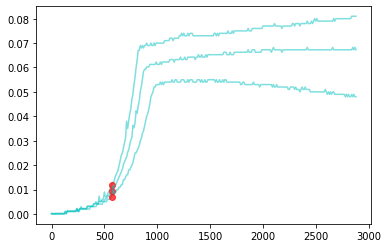

In [90]:
#visualizinglagtime
for i in Strain3_Pax: 
    plt.plot(np.arange(0,2890,10),Strain3_Pax[i], color ='c', alpha = .5)
    plt.plot(lagtimePax3*10,Strain3_Pax[i][lagtimePax3],'ro',alpha=.7) 


Growth rates Pax= [0.00032976190476190486, 0.00027619047619047604, 0.00018809523809523794]
Growth times Pax [75, 81, 89] [81, 87, 95]
Growth rates control [0.00039642857142857166, 0.000398809523809524, 0.0004142857142857144, 0.00035595238095238095]
Growth times controls [76, 76, 75, 76] [82, 82, 81, 82]
Growth curve sig: Ttest_indResult(statistic=-3.3726772296656544, pvalue=0.019831747502964268)


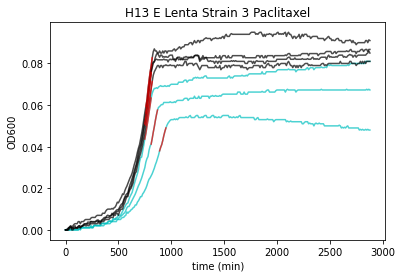

In [91]:
#Comparing drug condition to DMSO controls

#Comparing drug condition to DMSO controls

MGR_Pax3_corrected=[]
MGstarttimes_Pax3_corrected=[]
MGendtimes_Pax3_corrected=[]
Strain3_Pax_update=pd.DataFrame()

MGR_controls3_corrected=[]
MGstarttimes_controls3_corrected=[]
MGendtimes_controls3_corrected=[]
Strain3_controls_update=pd.DataFrame()

for i in Strain3_Pax: 
  Strain3_Pax_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
  for a in range(0,len(Strain3_Pax)-1):
    if abs(np.diff(Strain3_Pax[i])[a]>.001):
      newdatapoint=np.average(Strain3_Pax[i][a:a+3])
      Strain3_Pax_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_Pax[i][a+1]
      Strain3_Pax_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_Pax_corrected, color ='c', alpha =.7)
  Strain3_Pax_update[i]=Strain3_Pax_corrected      
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_Pax_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Pax_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Pax_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Pax3_corrected.append(slopemax)
  MGstarttimes_Pax3_corrected.append(starttime)
  MGendtimes_Pax3_corrected.append(endtime)

for i in Strain3_controls: 
  Strain3_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_controls)-1):
    if abs(np.diff(Strain3_controls[i])[a]>.001):
      newdatapoint=np.average(Strain3_controls[i][a:a+3])
      Strain3_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_controls[i][a+1]
      Strain3_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_controls_corrected, color ='k', alpha =.7)
  Strain3_controls_update[i]=Strain3_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls3_corrected.append(slopemax)
  MGstarttimes_controls3_corrected.append(starttime)
  MGendtimes_controls3_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 3 Paclitaxel')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificancePax3_corrected=stats.ttest_ind(MGR_Pax3_corrected,MGR_controls3_corrected)

print('Growth rates Pax=',MGR_Pax3_corrected)
print('Growth times Pax', MGstarttimes_Pax3_corrected, MGendtimes_Pax3_corrected)
print('Growth rates control',MGR_controls3_corrected)
print('Growth times controls', MGstarttimes_controls3_corrected, MGendtimes_controls3_corrected)

print('Growth curve sig:',CurvesignificancePax3_corrected)

if CurvesignificancePax3_corrected[1]<.05:
  StrainPax3_G_Sig_corrected='Yes'
else:
  StrainPax3_G_Sig_corrected='No'

In [92]:
MaxOD_Pax3_corrected=[]
MaxOD_controls3_corrected=[]
for i in Strain3_Pax_update:
  MaxOD_Pax3_corrected.append(Strain3_Pax_update.nlargest(10,[i])[i].mean())
for i in Strain3_controls_update:
  MaxOD_controls3_corrected.append(Strain3_controls_update.nlargest(10,[i])[i].mean())

ODsignificancePax3_corrected=stats.ttest_ind(MaxOD_Pax3_corrected,MaxOD_controls3_corrected)

print('Average Max OD Pax reps 1-3:',MaxOD_Pax3_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls3_corrected)
print('OD sig:',ODsignificancePax3_corrected)

if ODsignificancePax3_corrected[1]<.05:
  StrainPax3_OD_Sig_corrected='Yes'
else:
  StrainPax3_OD_Sig_corrected='No'

Average Max OD Pax reps 1-3: [0.08050000000000003, 0.06741666666666668, 0.05499999999999999]
Average Max OD Control reps 1-3: [0.09496666666666666, 0.08665000000000002, 0.08463333333333332, 0.08099999999999996]
OD sig: Ttest_indResult(statistic=-2.7062640100997544, pvalue=0.04246514511599579)


In [93]:
#Calculate Half Log Phase
Strain3Pax_LagTime=lagtimePax3
Strain3Pax_Start=round(np.average(MGstarttimes_Pax3_corrected))
Strain3Pax_End=round(np.average(MGendtimes_Pax3_corrected))
Strain3Pax_MGR_Time=(Strain3Pax_End-3)
print(Strain3Pax_MGR_Time)
Strain3_Pax_HalfLogPhase=Strain3Pax_MGR_Time-Strain3Pax_LagTime
print(Strain3_Pax_HalfLogPhase)

#Collect Data summary 
Strain3Pax_MGR=np.average(MGR_Pax3_corrected)
Strain3Pax_Growth_zstat=CurvesignificancePax3_corrected[0]
Strain3Pax_Growth_pvalue=CurvesignificancePax3_corrected[1]
Strain3Pax_OD=np.average(MaxOD_Pax3_corrected)
Strain3Pax_OD_zstat=ODsignificancePax3_corrected[0]
Strain3Pax_OD_pvalue=ODsignificancePax3_corrected[1]

Strain3Data=Strain3Data.append({'Lagtime':Strain3Pax_LagTime,
'HalfLogTime':Strain3_Pax_HalfLogPhase, 'MGR_Time':Strain3Pax_MGR_Time,\
'Max_GR':Strain3Pax_MGR,'Growth_Z':Strain3Pax_Growth_zstat,\
'Growth_Pvalue':Strain3Pax_Growth_pvalue,\
'Growth Significant?':StrainPax3_G_Sig_corrected,\
'Max_OD':Strain3Pax_OD,'OD_Z':Strain3Pax_OD_zstat,\
'OD_Pvalue':Strain3Pax_OD_pvalue,'OD Significant?':StrainPax3_OD_Sig_corrected},\
ignore_index=True)
Strain3Data=Strain3Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel'})
Strain3Data

85.0
28.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,54.0,44.0,98.0,0.000347,-0.517432,0.626923,No,0.125306,1.246566,0.267772,No
Irinotecan,50.0,27.0,77.0,0.000384,-0.447298,0.673372,No,0.090656,0.781771,0.469731,No
Paclitaxel,57.0,28.0,85.0,0.000265,-3.372677,0.019832,Yes,0.067639,-2.706264,0.042465,Yes


In [94]:
# for i in Strain3_Pax: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_Pax[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_Pax[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain3_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificancePax3=stats.ttest_ind(FinOD_Pax3,FinOD_controls3)
# print('Average ODs Pax=',FinOD_Pax3)
# print('Average ODs Control=',FinOD_controls3)
# print('OD sig:',ODsignificancePax3)

#Strain 3 Vin

In [95]:
#Calculate Lag Time 
lagsVin3=[]
for i in Strain3_Vin:
  lagsVin3.append(next(x[0] for x in list(enumerate(Strain3_Vin[i])) if x[1]>.01))
  print(lagsVin3)
lagtimeVin3=round(np.average(lagsVin3))
print(lagtimeVin3)

[39]
[39, 48]
[39, 48, 36]
41.0


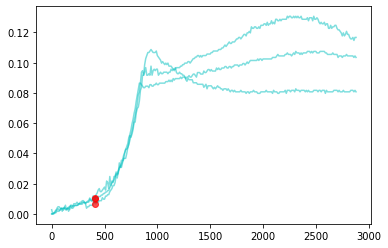

In [96]:
#visualizinglagtime
for i in Strain3_Vin: 
    plt.plot(np.arange(0,2890,10),Strain3_Vin[i], color ='c', alpha = .5)
    plt.plot(lagtimeVin3*10,Strain3_Vin[i][lagtimeVin3],'ro',alpha=.7) 


In [97]:
# (Strain3_Vin[Strain3_Vin>.107])

Growth rates Vin= [0.0004297619047619048, 0.0004476190476190476, 0.00039047619047619044]
Growth times Vin [83, 79, 76] [89, 85, 82]
Growth rates control [0.00039642857142857166, 0.000398809523809524, 0.0004142857142857144, 0.00035595238095238095]
Growth times controls [76, 76, 75, 76] [82, 82, 81, 82]
Growth curve sig: Ttest_indResult(statistic=1.5313109257641753, pvalue=0.18625615139074223)


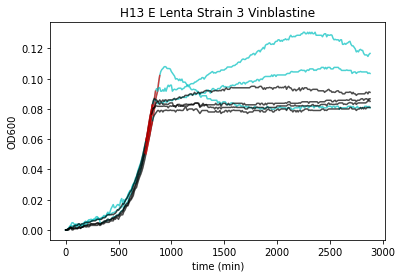

In [98]:
#Comparing drug condition to DMSO controls


MGR_Vin3_corrected=[]
MGstarttimes_Vin3_corrected=[]
MGendtimes_Vin3_corrected=[]
Strain3_Vin_update=pd.DataFrame()

MGR_controls3_corrected=[]
MGstarttimes_controls3_corrected=[]
MGendtimes_controls3_corrected=[]
Strain3_controls_update=pd.DataFrame()

for i in Strain3_Vin: 
  #plt.plot(np.arange(0,2890,10),Strain2_Vin[i], color ='c', alpha = .5)
  Strain3_Vin_corrected=[0]
  for a in range(0,len(Strain3_Vin)-1):
    if abs(np.diff(Strain3_Vin[i])[a]>.001):
      newdatapoint=np.average(Strain3_Vin[i][a:a+3])
      Strain3_Vin_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_Vin[i][a+1]
      Strain3_Vin_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_Vin_corrected, color ='c', alpha =.7)
  Strain3_Vin_update[i]=Strain3_Vin_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_Vin_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_Vin_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_Vin_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Vin3_corrected.append(slopemax)
  MGstarttimes_Vin3_corrected.append(starttime)
  MGendtimes_Vin3_corrected.append(endtime)


for i in Strain3_controls: 
  Strain3_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain3_controls)-1):
    if abs(np.diff(Strain3_controls[i])[a]>.001):
      newdatapoint=np.average(Strain3_controls[i][a:a+3])
      Strain3_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain3_controls[i][a+1]
      Strain3_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain3_controls_corrected, color ='k', alpha =.7)
  Strain3_controls_update[i]=Strain3_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain3_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain3_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain3_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls3_corrected.append(slopemax)
  MGstarttimes_controls3_corrected.append(starttime)
  MGendtimes_controls3_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 3 Vinblastine')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceVin3_corrected=stats.ttest_ind(MGR_Vin3_corrected,MGR_controls3_corrected)

print('Growth rates Vin=',MGR_Vin3_corrected)
print('Growth times Vin', MGstarttimes_Vin3_corrected, MGendtimes_Vin3_corrected)
print('Growth rates control',MGR_controls3_corrected)
print('Growth times controls', MGstarttimes_controls3_corrected, MGendtimes_controls3_corrected)

print('Growth curve sig:',CurvesignificanceVin3_corrected)

if CurvesignificanceVin3_corrected[1]<.05:
  StrainVin3_G_Sig_corrected='Yes'
else:
  StrainVin3_G_Sig_corrected='No'

In [99]:
MaxOD_Vin3_corrected=[]
MaxOD_controls3_corrected=[]
for i in Strain3_Vin_update:
  MaxOD_Vin3_corrected.append(Strain3_Vin_update.nlargest(10,[i])[i].mean())
for i in Strain3_controls_update:
  MaxOD_controls3_corrected.append(Strain3_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceVin3_corrected=stats.ttest_ind(MaxOD_Vin3_corrected,MaxOD_controls3_corrected)

print('Average Max OD Vin reps 1-3:',MaxOD_Vin3_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls3_corrected)
print('OD sig:',ODsignificanceVin3_corrected)

if ODsignificanceVin3_corrected[1]<.05:
  StrainVin3_OD_Sig_corrected='Yes'
else:
  StrainVin3_OD_Sig_corrected='No'

Average Max OD Vin reps 1-3: [0.10678333333333331, 0.13035, 0.10750000000000001]
Average Max OD Control reps 1-3: [0.09496666666666666, 0.08665000000000002, 0.08463333333333332, 0.08099999999999996]
OD sig: Ttest_indResult(statistic=3.8128836874983527, pvalue=0.012463305566334919)


In [100]:
#Calculate Half Log Phase
Strain3Vin_LagTime=lagtimeVin3
Strain3Vin_Start=round(np.average(MGstarttimes_Vin3_corrected))
Strain3Vin_End=round(np.average(MGendtimes_Vin3_corrected))
Strain3Vin_MGR_Time=(Strain3Vin_End-3)
print(Strain3Vin_MGR_Time)
Strain3_Vin_HalfLogPhase=Strain3Vin_MGR_Time-Strain3Vin_LagTime
print(Strain3_Vin_HalfLogPhase)

#Collect Data summary 
Strain3Vin_MGR=np.average(MGR_Vin3_corrected)
Strain3Vin_Growth_zstat=CurvesignificanceVin3_corrected[0]
Strain3Vin_Growth_pvalue=CurvesignificanceVin3_corrected[1]
Strain3Vin_OD=np.average(MaxOD_Vin3_corrected)
Strain3Vin_OD_zstat=ODsignificanceVin3_corrected[0]
Strain3Vin_OD_pvalue=ODsignificanceVin3_corrected[1]

Strain3Data=Strain3Data.append({'Lagtime':Strain3Vin_LagTime,
'HalfLogTime':Strain3_Vin_HalfLogPhase, 'MGR_Time':Strain3Vin_MGR_Time,\
'Max_GR':Strain3Vin_MGR,'Growth_Z':Strain3Vin_Growth_zstat,\
'Growth_Pvalue':Strain3Vin_Growth_pvalue,\
'Growth Significant?':StrainVin3_G_Sig_corrected,\
'Max_OD':Strain3Vin_OD,'OD_Z':Strain3Vin_OD_zstat,\
'OD_Pvalue':Strain3Vin_OD_pvalue,'OD Significant?':StrainVin3_OD_Sig_corrected},\
ignore_index=True)
Strain3Data=Strain3Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel',3:'Vinblastine'})
Strain3Data

82.0
41.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,54.0,44.0,98.0,0.000347,-0.517432,0.626923,No,0.125306,1.246566,0.267772,No
Irinotecan,50.0,27.0,77.0,0.000384,-0.447298,0.673372,No,0.090656,0.781771,0.469731,No
Paclitaxel,57.0,28.0,85.0,0.000265,-3.372677,0.019832,Yes,0.067639,-2.706264,0.042465,Yes
Vinblastine,41.0,41.0,82.0,0.000423,1.531311,0.186256,No,0.114878,3.812884,0.012463,Yes


In [101]:
# for i in Strain3_Vin: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_Vin[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_Vin[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain3_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain3_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain3_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceVin3=stats.ttest_ind(FinOD_Vin3,FinOD_controls3)
# print('Average ODs Vin=',FinOD_Vin3)
# print('Average ODs Control=',FinOD_controls3)
# print('OD sig:',ODsignificanceVin3)

#Strain 4 All

Text(0.5, 1.0, 'H13 E Lenta Strain 4 All Samples')

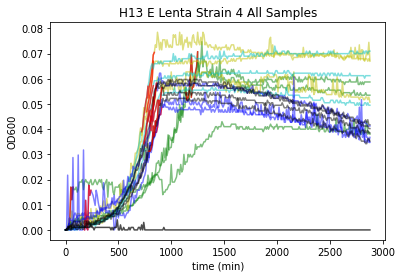

In [102]:
Strain4_FU= dfcorrected.iloc[:,72:75]
Strain4_Irino=dfcorrected.iloc[:,75:78]
Strain4_Pax=dfcorrected.iloc[:,81:84]
Strain4_Vin=dfcorrected.iloc[:,84:87]
Strain4_controls=dfcorrected.iloc[:,87:91]
MGAM_control4=dfcorrected.iloc[:,95]

for i in Strain4_FU:
    plt.plot(np.arange(0,2890,10),Strain4_FU[i], color ='g', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6
    for a in range(0,len(Strain4_FU[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_FU[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_FU[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain4_Irino:
    plt.plot(np.arange(0,2890,10),Strain4_Irino[i], color ='y', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain4_Irino[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Irino[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_Irino[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain4_Pax:
    plt.plot(np.arange(0,2890,10),Strain4_Pax[i], color ='c', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain4_Pax[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Pax[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_Pax[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain4_Vin:
    plt.plot(np.arange(0,2890,10),Strain4_Vin[i], color ='b', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain4_Vin[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Vin[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_Vin[i][starttime:endtime+1],color ='r', alpha = .7)
for i in Strain4_controls:
    plt.plot(np.arange(0,2890,10),Strain4_controls[i], color ='k', alpha = .5)
    slopemax=0
    starttime=0
    endtime=6    
    for a in range(0,len(Strain4_controls[i])-6):
      slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_controls[i][a:a+7])[0]
      if slope>slopemax:
          slopemax=slope
          starttime=a
          endtime=a+6
    plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_controls[i][starttime:endtime+1],color ='r', alpha = .7)
plt.plot(np.arange(0,2890,10),MGAM_control4, color ='k', alpha = .7)
plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 4 All Samples')

In [103]:
Strain4_Vin.head()

,H1,H2,H3
0,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000
2,0.00075,0.02175,0.00025
3,0.00175,0.00000,0.00225
4,0.00475,0.00000,0.00225


#Strain 4 FU

In [104]:
#(Strain4_FU[Strain4_FU>.107])

In [105]:
#Calculate Lag Time 
lagsFU4=[]
for i in Strain4_FU:
  lagsFU4.append(next(x[0] for x in list(enumerate(Strain4_FU[i])) if x[1]>.01))
  print(lagsFU4)
#NOTE-- due to aberration, dropped outlier
del lagsFU4[0]
#calculated new lagtime 
lagtimeFU4=round(np.average(lagsFU4))
print(lagtimeFU4)

[5]
[5, 65]
[5, 65, 64]
64.0


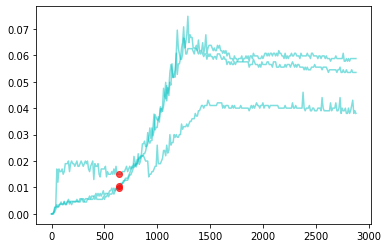

In [106]:
for i in Strain4_FU: 
    plt.plot(np.arange(0,2890,10),Strain4_FU[i], color ='c', alpha = .5)
    plt.plot(lagtimeFU4*10,Strain4_FU[i][lagtimeFU4],'ro',alpha=.7) 
    

In [107]:
#Seems like aberration is correted at time point 92 
#Strain4_FU['G1']

#tried to manually fix, but left for now 

# G1_baseline=Strain4_FU['G1'].iloc[0:45].mean()
# G1_baseline
#Strain4_FU['G1'][:100]=Strain4_FU['G1'][:100]-G1_baseline

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Growth rates FU= [8.520408163265313e-05, 0.0001872448979591838, 0.00016938775510204094]
Growth times FU [101, 119, 108] [107, 125, 114]
Growth rates control [0.0002219387755102042, 0.00018010204081632633, 0.00021734693877551033, 0.00019846938775510195]
Growth times controls [83, 84, 79, 75] [89, 90, 85, 81]
Growth curve sig: Ttest_indResult(statistic=-1.9953579015546337, pvalue=0.10254566397018587)


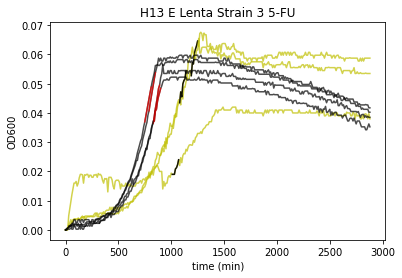

In [108]:
#Comparing drug condition to DMSO controls
#NOTE - manually excluded early hump for max growth rate in drug condition

#CURVE SMOOTHING 
MGR_FU4_corrected=[]
MGstarttimes_FU4_corrected=[]
MGendtimes_FU4_corrected=[]
Strain4_FU_update=pd.DataFrame()

MGR_controls4_corrected=[]
MGstarttimes_controls4_corrected=[]
MGendtimes_controls4_corrected=[]
Strain4_controls_update=pd.DataFrame()


for i in Strain4_FU:
  Strain4_FU_corrected=[0]
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_FU)-1):
    if abs(np.diff(Strain4_FU[i])[a]>.001):
      newdatapoint=np.average(Strain4_FU[i][a-2:a+5])
      Strain4_FU_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_FU[i][a+1]
      Strain4_FU_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_FU_corrected, color ='y', alpha =.7)
  Strain4_FU_update[i]=Strain4_FU_corrected
  #calculate corrected new max slope 
  slopemaxcorrected=0
  starttimecorrected=0
  endtimecorrected=6
  for a in range(50,len(Strain4_FU_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_FU_corrected[a:a+7])[0]
    if slope>slopemaxcorrected:
        slopemaxcorrected=slope
        starttimecorrected=a
        endtimecorrected=a+6
  plt.plot(np.arange(0,2890,10)[starttimecorrected:endtimecorrected+1],Strain4_FU_corrected[starttimecorrected:endtimecorrected+1],color ='k', alpha = .9)
  MGR_FU4_corrected.append(slopemaxcorrected)
  MGstarttimes_FU4_corrected.append(starttimecorrected)
  MGendtimes_FU4_corrected.append(endtimecorrected)

for i in Strain4_controls: 
  Strain4_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_controls)-1):
    if abs(np.diff(Strain4_controls[i])[a]>.001):
      newdatapoint=np.average(Strain4_controls[i][a-2:a+5])
      Strain4_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_controls[i][a+1]
      Strain4_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_controls_corrected, color ='k', alpha =.7)
  Strain4_controls_update[i]=Strain4_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls4_corrected.append(slopemax)
  MGstarttimes_controls4_corrected.append(starttime)
  MGendtimes_controls4_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 3 5-FU')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceFU4_corrected=stats.ttest_ind(MGR_FU4_corrected,MGR_controls4_corrected)

print('Growth rates FU=',MGR_FU4_corrected)
print('Growth times FU', MGstarttimes_FU4_corrected, MGendtimes_FU4_corrected)
print('Growth rates control',MGR_controls4_corrected)
print('Growth times controls', MGstarttimes_controls4_corrected, MGendtimes_controls4_corrected)

print('Growth curve sig:',CurvesignificanceFU4_corrected)

if CurvesignificanceFU4_corrected[1]<.05:
  StrainFU4_G_Sig_corrected='Yes'
else:
  StrainFU4_G_Sig_corrected='No'

In [109]:
#Strain4_FU

In [110]:
MaxOD_FU4_corrected=[]
MaxOD_controls4_corrected=[]
for i in Strain4_FU_update:
  MaxOD_FU4_corrected.append(Strain4_FU_update.nlargest(10,[i])[i].mean())
for i in Strain4_controls_update:
  MaxOD_controls4_corrected.append(Strain4_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceFU4_corrected=stats.ttest_ind(MaxOD_FU4_corrected,MaxOD_controls4_corrected)

print('Average Max OD FU reps 1-3:',MaxOD_FU4_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls4_corrected)
print('OD sig:',ODsignificanceFU4_corrected)

if ODsignificanceFU4_corrected[1]<.05:
  StrainFU4_OD_Sig_corrected='Yes'
else:
  StrainFU4_OD_Sig_corrected='No'


Average Max OD FU reps 1-3: [0.041599999999999984, 0.06595, 0.0626]
Average Max OD Control reps 1-3: [0.054699999999999985, 0.052250000000000005, 0.05975000000000001, 0.05825000000000001]
OD sig: Ttest_indResult(statistic=0.07167947252103855, pvalue=0.9456358379710206)


In [111]:
#Calculate Half Log Phase
Strain4FU_LagTime=lagtimeFU4
Strain4FU_Start=round(np.average(MGstarttimes_FU4_corrected))
Strain4FU_End=round(np.average(MGendtimes_FU4_corrected))
Strain4FU_MGR_Time=(Strain4FU_End-3)
print(Strain4FU_MGR_Time)
Strain4_FU_HalfLogPhase=Strain4FU_MGR_Time-Strain4FU_LagTime
print(Strain4_FU_HalfLogPhase)

#Collect Data summary 
Strain4FU_MGR=np.average(MGR_FU4_corrected)
Strain4FU_Growth_zstat=CurvesignificanceFU4_corrected[0]
Strain4FU_Growth_pvalue=CurvesignificanceFU4_corrected[1]
Strain4FU_OD=np.average(MaxOD_FU4_corrected)
Strain4FU_OD_zstat=ODsignificanceFU4_corrected[0]
Strain4FU_OD_pvalue=ODsignificanceFU4_corrected[1]

Strain4Data=pd.DataFrame(columns=['Lagtime','HalfLogTime','MGR_Time',\
'Max_GR','Growth_Z','Growth_Pvalue','Growth Significant?',\
'Max_OD','OD_Z','OD_Pvalue','OD Significant?'])
Strain4Data=Strain4Data.append({'Lagtime':Strain4FU_LagTime,
'HalfLogTime':Strain4_FU_HalfLogPhase, 'MGR_Time':Strain4FU_MGR_Time,\
'Max_GR':Strain4FU_MGR,'Growth_Z':Strain4FU_Growth_zstat,\
'Growth_Pvalue':Strain4FU_Growth_pvalue,\
'Growth Significant?':StrainFU4_G_Sig_corrected,\
'Max_OD':Strain4FU_OD,'OD_Z':Strain4FU_OD_zstat,\
'OD_Pvalue':Strain4FU_OD_pvalue,'OD Significant?':StrainFU4_OD_Sig_corrected},\
ignore_index=True)
Strain4Data=Strain4Data.rename(index={0:'5-Fluorouracil'})
Strain4Data

112.0
48.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,64.0,48.0,112.0,0.000147,-1.995358,0.102546,No,0.056717,0.071679,0.945636,No


In [112]:
# for i in Strain4_FU: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_FU[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_FU[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain4_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceFU4=stats.ttest_ind(FinOD_FU4,FinOD_controls4)
# print('Average ODs Vin=',FinOD_FU4)
# print('Average ODs Control=',FinOD_controls4)
# print('OD sig:',ODsignificanceFU4)

#Strain4 Irino

In [113]:
#Calculate Lag Time 
lagsIrino4=[]
for i in Strain4_Irino:
  lagsIrino4.append(next(x[0] for x in list(enumerate(Strain4_Irino[i])) if x[1]>.01))
  print(lagsIrino4)
lagtimeIrino4=round(np.average(lagsIrino4))
print(lagtimeIrino4)

[36]
[36, 52]
[36, 52, 51]
46.0


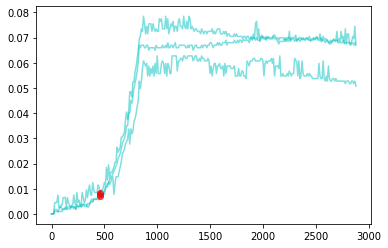

In [114]:
for i in Strain4_Irino: 
    plt.plot(np.arange(0,2890,10),Strain4_Irino[i], color ='c', alpha = .5)
    plt.plot(lagtimeIrino4*10,Strain4_Irino[i][lagtimeIrino4],'ro',alpha=.7) 


In [115]:
# (Strain4_Irino[Strain4_Irino>.107])

Growth rates Irino= [0.0003035714285714286, 0.00027142857142857166, 0.00028809523809523806]
Growth times Irino [78, 80, 78] [84, 86, 84]
Growth rates control [0.00023571428571428577, 0.00019285714285714246, 0.00022261904761904775, 0.00021428571428571422]
Growth times controls [85, 84, 80, 73] [91, 90, 86, 79]
Growth curve sig: Ttest_indResult(statistic=5.415022566813467, pvalue=0.0029067551267343826)


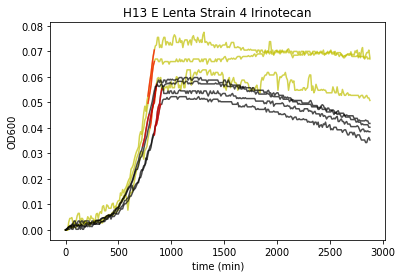

In [116]:
#FLAG NEED TO SMOOTH THE CURVE
#Comparing drug condition to DMSO controls

MGR_Irino4_corrected=[]
MGstarttimes_Irino4_corrected=[]
MGendtimes_Irino4_corrected=[]
Strain4_Irino_update=pd.DataFrame()

MGR_controls4_corrected=[]
MGstarttimes_controls4_corrected=[]
MGendtimes_controls4_corrected=[]
Strain4_controls_update=pd.DataFrame()

for i in Strain4_Irino: 
  Strain4_Irino_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain2_Irino[i], color ='c', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_Irino)-1):
    if abs(np.diff(Strain4_Irino[i])[a]>.001):
      newdatapoint=np.average(Strain4_Irino[i][a:a+3])
      Strain4_Irino_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_Irino[i][a+1]
      Strain4_Irino_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_Irino_corrected, color ='y', alpha =.7)
  Strain4_Irino_update[i]=Strain4_Irino_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_Irino_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Irino_corrected[a:a+7])[0]
    if slope>slopemax:
      slopemax=slope
      starttime=a
      endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_Irino_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Irino4_corrected.append(slopemax)
  MGstarttimes_Irino4_corrected.append(starttime)
  MGendtimes_Irino4_corrected.append(endtime)

for i in Strain4_controls: 
  Strain4_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_controls)-1):
    if abs(np.diff(Strain4_controls[i])[a]>.001):
      newdatapoint=np.average(Strain4_controls[i][a:a+3])
      Strain4_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_controls[i][a+1]
      Strain4_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_controls_corrected, color ='k', alpha =.7)
  Strain4_controls_update[i]=Strain4_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls4_corrected.append(slopemax)
  MGstarttimes_controls4_corrected.append(starttime)
  MGendtimes_controls4_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 4 Irinotecan')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceIrino4_corrected=stats.ttest_ind(MGR_Irino4_corrected,MGR_controls4_corrected)

print('Growth rates Irino=',MGR_Irino4_corrected)
print('Growth times Irino', MGstarttimes_Irino4_corrected, MGendtimes_Irino4_corrected)
print('Growth rates control',MGR_controls4_corrected)
print('Growth times controls', MGstarttimes_controls4_corrected, MGendtimes_controls4_corrected)

print('Growth curve sig:',CurvesignificanceIrino4_corrected)

if CurvesignificanceIrino4_corrected[1]<.05:
  StrainIrino4_G_Sig_corrected='Yes'
else:
  StrainIrino4_G_Sig_corrected='No'

In [117]:
MaxOD_Irino4_corrected=[]
MaxOD_controls4_corrected=[]
for i in Strain4_Irino_update:
  MaxOD_Irino4_corrected.append(Strain4_Irino_update.nlargest(10,[i])[i].mean())
for i in Strain4_controls_update:
  MaxOD_controls4_corrected.append(Strain4_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceIrino4_corrected=stats.ttest_ind(MaxOD_Irino4_corrected,MaxOD_controls4_corrected)

print('Average Max OD Irino reps 1-3:',MaxOD_Irino4_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls4_corrected)
print('OD sig:',ODsignificanceIrino4_corrected)

if ODsignificanceIrino4_corrected[1]<.05:
  StrainIrino4_OD_Sig_corrected='Yes'
else:
  StrainIrino4_OD_Sig_corrected='No'

Average Max OD Irino reps 1-3: [0.07600000000000001, 0.06274999999999999, 0.07019999999999997]
Average Max OD Control reps 1-3: [0.05479999999999998, 0.052250000000000005, 0.05975000000000001, 0.05825000000000001]
OD sig: Ttest_indResult(statistic=3.540006846573375, pvalue=0.016562452676637023)


In [118]:
#Calculate Half Log Phase
Strain4Irino_LagTime=lagtimeIrino4
Strain4Irino_Start=round(np.average(MGstarttimes_Irino4_corrected))
Strain4Irino_End=round(np.average(MGendtimes_Irino4_corrected))
Strain4Irino_MGR_Time=(Strain4Irino_End-3)
print(Strain4Irino_MGR_Time)
Strain4_Irino_HalfLogPhase=Strain4Irino_MGR_Time-Strain4Irino_LagTime
print(Strain4_Irino_HalfLogPhase)

#Collect Data summary 
Strain4Irino_MGR=np.average(MGR_Irino4_corrected)
Strain4Irino_Growth_zstat=CurvesignificanceIrino4_corrected[0]
Strain4Irino_Growth_pvalue=CurvesignificanceIrino4_corrected[1]
Strain4Irino_OD=np.average(MaxOD_Irino4_corrected)
Strain4Irino_OD_zstat=ODsignificanceIrino4_corrected[0]
Strain4Irino_OD_pvalue=ODsignificanceIrino4_corrected[1]


Strain4Data=Strain4Data.append({'Lagtime':Strain4Irino_LagTime,
'HalfLogTime':Strain4_Irino_HalfLogPhase, 'MGR_Time':Strain4Irino_MGR_Time,\
'Max_GR':Strain4Irino_MGR,'Growth_Z':Strain4Irino_Growth_zstat,\
'Growth_Pvalue':Strain4Irino_Growth_pvalue,\
'Growth Significant?':StrainIrino4_G_Sig_corrected,\
'Max_OD':Strain4Irino_OD,'OD_Z':Strain4Irino_OD_zstat,\
'OD_Pvalue':Strain4Irino_OD_pvalue,'OD Significant?':StrainIrino4_OD_Sig_corrected},\
ignore_index=True)
Strain4Data=Strain4Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan'})
Strain4Data

82.0
36.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,64.0,48.0,112.0,0.000147,-1.995358,0.102546,No,0.056717,0.071679,0.945636,No
Irinotecan,46.0,36.0,82.0,0.000288,5.415023,0.002907,Yes,0.069650,3.540007,0.016562,Yes


In [119]:
# for i in Strain4_Irino: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_Irino[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_Irino[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain4_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceIrino4=stats.ttest_ind(FinOD_Irino4,FinOD_controls4)
# print('Average ODs Irino=',FinOD_Irino4)
# print('Average ODs Control=',FinOD_controls4)
# print('OD sig:',ODsignificanceIrino4)

#Strain 4 Pax

In [120]:
#Calculate Lag Time 
lagsPax4=[]
for i in Strain4_Pax:
  lagsPax4.append(next(x[0] for x in list(enumerate(Strain4_Pax[i])) if x[1]>.005))
  print(lagsPax4)
lagtimePax4=round(np.average(lagsPax4))
print(lagtimePax4)

[44]
[44, 40]
[44, 40, 40]
41.0


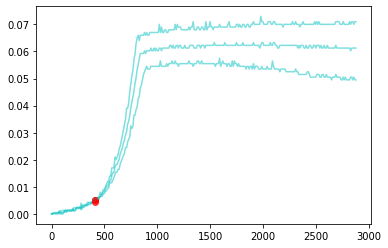

In [121]:
for i in Strain4_Pax: 
    plt.plot(np.arange(0,2890,10),Strain4_Pax[i], color ='c', alpha = .5)
    plt.plot(lagtimePax4*10,Strain4_Pax[i][lagtimePax4],'ro',alpha=.7) 


In [122]:
# (Strain4_Pax[Strain4_Pax>.107])

Growth rates Pax= [0.0002964285714285713, 0.0002369047619047621, 0.00019047619047619064]
Growth times Pax [73, 77, 80] [79, 83, 86]
Growth rates control [0.00023571428571428577, 0.00019285714285714246, 0.00022261904761904775, 0.00021428571428571422]
Growth times controls [85, 84, 80, 73] [91, 90, 86, 79]
Growth curve sig: Ttest_indResult(statistic=0.8965486529505955, pvalue=0.41104394714190823)


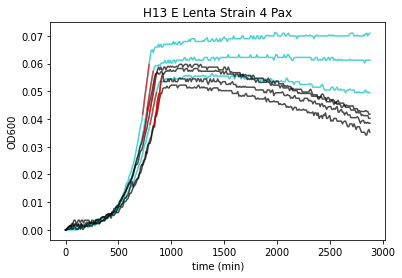

In [123]:
#Comparing drug condition to DMSO controls

MGR_Pax4_corrected=[]
MGstarttimes_Pax4_corrected=[]
MGendtimes_Pax4_corrected=[]
Strain4_Pax_update=pd.DataFrame()

MGR_controls4_corrected=[]
MGstarttimes_controls4_corrected=[]
MGendtimes_controls4_corrected=[]
Strain4_controls_update=pd.DataFrame()

for i in Strain4_Pax: 
  Strain4_Pax_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_Pax[i], color ='c', alpha = .5)
  for a in range(0,len(Strain4_Pax)-1):
    if abs(np.diff(Strain4_Pax[i])[a]>.001):
      newdatapoint=np.average(Strain4_Pax[i][a:a+3])
      Strain4_Pax_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_Pax[i][a+1]
      Strain4_Pax_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_Pax_corrected, color ='c', alpha =.7)
  Strain4_Pax_update[i]=Strain4_Pax_corrected      
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_Pax_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Pax_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_Pax_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_Pax4_corrected.append(slopemax)
  MGstarttimes_Pax4_corrected.append(starttime)
  MGendtimes_Pax4_corrected.append(endtime)

for i in Strain4_controls: 
  Strain4_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_controls)-1):
    if abs(np.diff(Strain4_controls[i])[a]>.001):
      newdatapoint=np.average(Strain4_controls[i][a:a+3])
      Strain4_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_controls[i][a+1]
      Strain4_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_controls_corrected, color ='k', alpha =.7)
  Strain4_controls_update[i]=Strain4_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls4_corrected.append(slopemax)
  MGstarttimes_controls4_corrected.append(starttime)
  MGendtimes_controls4_corrected.append(endtime)

plt.xlabel('time (min)')
plt.ylabel('OD600')
plt.title('H13 E Lenta Strain 4 Pax')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificancePax4_corrected=stats.ttest_ind(MGR_Pax4_corrected,MGR_controls4_corrected)

print('Growth rates Pax=',MGR_Pax4_corrected)
print('Growth times Pax', MGstarttimes_Pax4_corrected, MGendtimes_Pax4_corrected)
print('Growth rates control',MGR_controls4_corrected)
print('Growth times controls', MGstarttimes_controls4_corrected, MGendtimes_controls4_corrected)

print('Growth curve sig:',CurvesignificancePax4_corrected)

if CurvesignificancePax4_corrected[1]<.05:
  StrainPax4_G_Sig_corrected='Yes'
else:
  StrainPax4_G_Sig_corrected='No'

In [124]:
MaxOD_Pax4_corrected=[]
MaxOD_controls4_corrected=[]
for i in Strain4_Pax_update:
  MaxOD_Pax4_corrected.append(Strain4_Pax_update.nlargest(10,[i])[i].mean())
for i in Strain4_controls_update:
  MaxOD_controls4_corrected.append(Strain4_controls_update.nlargest(10,[i])[i].mean())

ODsignificancePax4_corrected=stats.ttest_ind(MaxOD_Pax4_corrected,MaxOD_controls4_corrected)

print('Average Max OD Pax reps 1-3:',MaxOD_Pax4_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls4_corrected)
print('OD sig:',ODsignificancePax4_corrected)

if ODsignificancePax4_corrected[1]<.05:
  StrainPax4_OD_Sig_corrected='Yes'
else:
  StrainPax4_OD_Sig_corrected='No'

Average Max OD Pax reps 1-3: [0.07103333333333336, 0.06325, 0.055866666666666676]
Average Max OD Control reps 1-3: [0.05479999999999998, 0.052250000000000005, 0.05975000000000001, 0.05825000000000001]
OD sig: Ttest_indResult(statistic=1.7056626111202968, pvalue=0.14878667647868843)


Average ODs Pax= [0.07022471910112361, 0.061811797752809025, 0.05166853932584272]
Average ODs Control= [0.04470224719101126, 0.04095786516853932, 0.047873595505618, 0.04695786516853931]
OD sig: Ttest_indResult(statistic=3.3262032613652424, pvalue=0.02086569155269083)


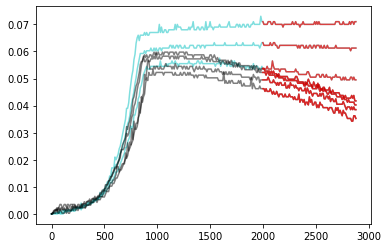

In [125]:
FinOD_Pax4=[]
FinOD_controls4=[]

for i in Strain4_Pax: 
  ODstart=200
  ODend=300
  plt.plot(np.arange(0,2890,10),Strain4_Pax[i], color ='c', alpha = .5)
  plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain4_Pax[i][ODstart:ODend+1],color='r', alpha = .7)
  ODmean=Strain4_Pax[i][ODstart:ODend+1].describe()[1]
  FinOD_Pax4.append(ODmean)
for i in Strain4_controls:
  ODstart=200
  ODend=300  
  plt.plot(np.arange(0,2890,10),Strain4_controls[i], color ='k', alpha = .5)
  plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],Strain4_controls[i][ODstart:ODend+1],color='r', alpha = .7)
  ODmean=Strain4_controls[i][ODstart:ODend+1].describe()[1]
  FinOD_controls4.append(ODmean)

ODsignificancePax4_retry=stats.ttest_ind(FinOD_Pax4,FinOD_controls4)
print('Average ODs Pax=',FinOD_Pax4)
print('Average ODs Control=',FinOD_controls4)
print('OD sig:',ODsignificancePax4_retry)

In [126]:
#Calculate Half Log Phase
Strain4Pax_LagTime=lagtimePax4
Strain4Pax_Start=round(np.average(MGstarttimes_Pax4_corrected))
Strain4Pax_End=round(np.average(MGendtimes_Pax4_corrected))
Strain4Pax_MGR_Time=(Strain4Pax_End-3)
print(Strain4Pax_MGR_Time)
Strain4_Pax_HalfLogPhase=Strain4Pax_MGR_Time-Strain4Pax_LagTime
print(Strain4_Pax_HalfLogPhase)

#Collect Data summary 
Strain4Pax_MGR=np.average(MGR_Pax4_corrected)
Strain4Pax_Growth_zstat=CurvesignificancePax4_corrected[0]
Strain4Pax_Growth_pvalue=CurvesignificancePax4_corrected[1]
Strain4Pax_OD=np.average(MaxOD_Pax4_corrected)
Strain4Pax_OD_zstat=ODsignificancePax4_corrected[0]
Strain4Pax_OD_pvalue=ODsignificancePax4_corrected[1]


Strain4Data=Strain4Data.append({'Lagtime':Strain4Pax_LagTime,
'HalfLogTime':Strain4_Pax_HalfLogPhase, 'MGR_Time':Strain4Pax_MGR_Time,\
'Max_GR':Strain4Pax_MGR,'Growth_Z':Strain4Pax_Growth_zstat,\
'Growth_Pvalue':Strain4Pax_Growth_pvalue,\
'Growth Significant?':StrainPax4_G_Sig_corrected,\
'Max_OD':Strain4Pax_OD,'OD_Z':Strain4Pax_OD_zstat,\
'OD_Pvalue':Strain4Pax_OD_pvalue,'OD Significant?':StrainPax4_OD_Sig_corrected},\
ignore_index=True)
Strain4Data=Strain4Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel'})
Strain4Data

80.0
39.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,64.0,48.0,112.0,0.000147,-1.995358,0.102546,No,0.056717,0.071679,0.945636,No
Irinotecan,46.0,36.0,82.0,0.000288,5.415023,0.002907,Yes,0.069650,3.540007,0.016562,Yes
Paclitaxel,41.0,39.0,80.0,0.000241,0.896549,0.411044,No,0.063383,1.705663,0.148787,No


#Strain 4 Vin

In [127]:
# (Strain4_Vin[Strain4_Vin>.107])

In [128]:
#Calculate Lag Time 
lagsVin4=[]
for i in Strain4_Vin:
  lagsVin4.append(next(x[0] for x in list(enumerate(Strain4_Vin[i])) if x[1]>.01))
  print(lagsVin4)
#NOTE-- due to aberration, dropped outlier
del lagsVin4[1]
print(lagsVin4)
lagtimeVin4=round(np.average(lagsVin4))
print(lagtimeVin4)

[44]
[44, 2]
[44, 2, 40]
[44, 40]
42.0


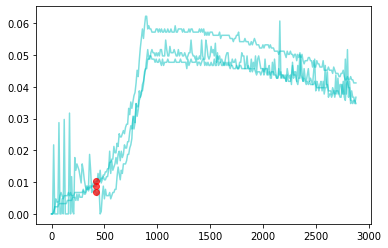

In [129]:
for i in Strain4_Vin: 
    plt.plot(np.arange(0,2890,10),Strain4_Vin[i], color ='c', alpha = .5)
    plt.plot(lagtimeVin4*10,Strain4_Vin[i][lagtimeVin4],'ro',alpha=.7) 


In [130]:
# Strain4_Vin[['H1','H2']][0:37]

In [131]:
# Strain4_Vin['H2'][0:33]=Strain4_Vin['H1'][0:33]

In [132]:
# for i in Strain4_Vin: 
#     plt.plot(np.arange(0,2890,10),Strain4_Vin[i], color ='c', alpha = .5)
#     plt.plot(lagtimeVin4*10,Strain4_Vin[i][lagtimeVin4],'ro',alpha=.7) 


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Growth rates Vin= [0.00015867346938775524, 0.0001806122448979591, 0.000251530612244898]
Growth times Vin [86, 84, 80] [92, 90, 86]
Growth rates control [0.0002219387755102042, 0.00018010204081632633, 0.00021734693877551033, 0.00019846938775510195]
Growth times controls [83, 84, 79, 75] [89, 90, 85, 81]
Growth curve sig: Ttest_indResult(statistic=-0.2890053422645572, pvalue=0.7841765527744267)


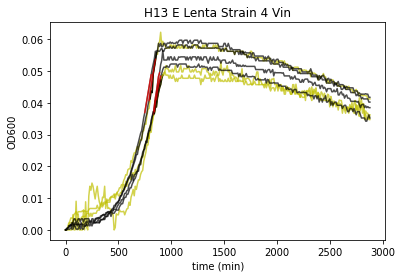

In [133]:
#CURVE SMOOTHING 
#Manually excluded first 50 time points again !
MGR_Vin4_corrected=[]
MGstarttimes_Vin4_corrected=[]
MGendtimes_Vin4_corrected=[]
Strain4_Vin_update=pd.DataFrame()

MGR_controls4_corrected=[]
MGstarttimes_controls4_corrected=[]
MGendtimes_controls4_corrected=[]
Strain4_controls_update=pd.DataFrame()

for i in Strain4_Vin:
  Strain4_Vin_corrected=[0]
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_Vin)-1):
    if abs(np.diff(Strain4_Vin[i])[a]>.001):
      newdatapoint=np.average(Strain4_Vin[i][a-2:a+5])
      Strain4_Vin_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_Vin[i][a+1]
      Strain4_Vin_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_Vin_corrected, color ='y', alpha =.7)
  Strain4_Vin_update[i]=Strain4_Vin_corrected
  #calculate corrected new max slope 
  slopemaxcorrected=0
  starttimecorrected=0
  endtimecorrected=6
  for a in range(50,len(Strain4_Vin_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_Vin_corrected[a:a+7])[0]
    if slope>slopemaxcorrected:
        slopemaxcorrected=slope
        starttimecorrected=a
        endtimecorrected=a+6
  plt.plot(np.arange(0,2890,10)[starttimecorrected:endtimecorrected+1],Strain4_Vin_corrected[starttimecorrected:endtimecorrected+1],color ='k', alpha = .9)
  MGR_Vin4_corrected.append(slopemaxcorrected)
  MGstarttimes_Vin4_corrected.append(starttimecorrected)
  MGendtimes_Vin4_corrected.append(endtimecorrected)


for i in Strain4_controls: 
  Strain4_controls_corrected=[0]
  #plt.plot(np.arange(0,2890,10),Strain1_controls[i], color ='k', alpha = .5)
  #smooth each point where there is a greater jump between time points than .001
  for a in range(0,len(Strain4_controls)-1):
    if abs(np.diff(Strain4_controls[i])[a]>.001):
      newdatapoint=np.average(Strain4_controls[i][a-2:a+5])
      Strain4_controls_corrected.append(newdatapoint)
    else:
      newdatapoint=Strain4_controls[i][a+1]
      Strain4_controls_corrected.append(newdatapoint)
  plt.plot(np.arange(0,2890,10),Strain4_controls_corrected, color ='k', alpha =.7)
  Strain4_controls_update[i]=Strain4_controls_corrected    
  slopemax=0
  starttime=0
  endtime=6
  for a in range(0,len(Strain4_controls_corrected)-6):
    slope= stats.linregress(np.arange(0,2890,10)[a:a+7], Strain4_controls_corrected[a:a+7])[0]
    if slope>slopemax:
        slopemax=slope
        starttime=a
        endtime=a+6
  plt.plot(np.arange(0,2890,10)[starttime:endtime+1],Strain4_controls_corrected[starttime:endtime+1],color ='r', alpha = .7)
  MGR_controls4_corrected.append(slopemax)
  MGstarttimes_controls4_corrected.append(starttime)
  MGendtimes_controls4_corrected.append(endtime)


plt.xlabel('time (min)')
plt.ylabel('OD600')

plt.title('H13 E Lenta Strain 4 Vin')
#Significance Tests, individual T test for mean difference, growth rates and saturation ODs 

CurvesignificanceVin4_corrected=stats.ttest_ind(MGR_Vin4_corrected,MGR_controls4_corrected)

print('Growth rates Vin=',MGR_Vin4_corrected)
print('Growth times Vin', MGstarttimes_Vin4_corrected, MGendtimes_Vin4_corrected)
print('Growth rates control',MGR_controls4_corrected)
print('Growth times controls', MGstarttimes_controls4_corrected, MGendtimes_controls4_corrected)

print('Growth curve sig:',CurvesignificanceVin4_corrected)

if CurvesignificanceVin4_corrected[1]<.05:
  StrainVin4_G_Sig_corrected='Yes'
else:
  StrainVin4_G_Sig_corrected='No'

In [134]:
MaxOD_Vin4_corrected=[]
MaxOD_controls4_corrected=[]
for i in Strain4_Vin_update:
  MaxOD_Vin4_corrected.append(Strain4_Vin_update.nlargest(10,[i])[i].mean())
for i in Strain4_controls_update:
  MaxOD_controls4_corrected.append(Strain4_controls_update.nlargest(10,[i])[i].mean())

ODsignificanceVin4_corrected=stats.ttest_ind(MaxOD_Vin4_corrected,MaxOD_controls4_corrected)

print('Average Max OD Vin reps 1-3:',MaxOD_Vin4_corrected)
print('Average Max OD Control reps 1-3:',MaxOD_controls4_corrected)
print('OD sig:',ODsignificanceVin4_corrected)

if ODsignificanceVin4_corrected[1]<.05:
  StrainVin4_OD_Sig_corrected='Yes'
else:
  StrainVin4_OD_Sig_corrected='No'

Average Max OD Vin reps 1-3: [0.05149285714285714, 0.048921428571428546, 0.05890714285714286]
Average Max OD Control reps 1-3: [0.054699999999999985, 0.052250000000000005, 0.05975000000000001, 0.05825000000000001]
OD sig: Ttest_indResult(statistic=-0.9746532987851562, pvalue=0.3744953023203888)


In [135]:
#Calculate Half Log Phase
Strain4Vin_LagTime=lagtimeVin4
Strain4Vin_Start=round(np.average(MGstarttimes_Vin4_corrected))
Strain4Vin_End=round(np.average(MGendtimes_Vin4_corrected))
Strain4Vin_MGR_Time=(Strain4Vin_End-3)
print(Strain4Vin_MGR_Time)
Strain4_Vin_HalfLogPhase=Strain4Vin_MGR_Time-Strain4Vin_LagTime
print(Strain4_Vin_HalfLogPhase)

#Collect Data summary 
Strain4Vin_MGR=np.average(MGR_Vin4_corrected)
Strain4Vin_Growth_zstat=CurvesignificanceVin4_corrected[0]
Strain4Vin_Growth_pvalue=CurvesignificanceVin4_corrected[1]
Strain4Vin_OD=np.average(MaxOD_Vin4_corrected)
Strain4Vin_OD_zstat=ODsignificanceVin4_corrected[0]
Strain4Vin_OD_pvalue=ODsignificanceVin4_corrected[1]


Strain4Data=Strain4Data.append({'Lagtime':Strain4Vin_LagTime,
'HalfLogTime':Strain4_Vin_HalfLogPhase, 'MGR_Time':Strain4Vin_MGR_Time,\
'Max_GR':Strain4Vin_MGR,'Growth_Z':Strain4Vin_Growth_zstat,\
'Growth_Pvalue':Strain4Vin_Growth_pvalue,\
'Growth Significant?':StrainVin4_G_Sig_corrected,\
'Max_OD':Strain4Vin_OD,'OD_Z':Strain4Vin_OD_zstat,\
'OD_Pvalue':Strain4Vin_OD_pvalue,'OD Significant?':StrainVin4_OD_Sig_corrected},\
ignore_index=True)
Strain4Data=Strain4Data.rename(index={0:'5-Fluorouracil',1:'Irinotecan',2:'Paclitaxel',3:'Vinblastine'})
Strain4Data

86.0
44.0


,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,64.0,48.0,112.0,0.000147,-1.995358,0.102546,No,0.056717,0.071679,0.945636,No
Irinotecan,46.0,36.0,82.0,0.000288,5.415023,0.002907,Yes,0.069650,3.540007,0.016562,Yes
Paclitaxel,41.0,39.0,80.0,0.000241,0.896549,0.411044,No,0.063383,1.705663,0.148787,No
Vinblastine,42.0,44.0,86.0,0.000197,-0.289005,0.784177,No,0.053107,-0.974653,0.374495,No


In [136]:
# for i in Strain4_Vin: 
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_Vin[i]), color ='c', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_Vin[i])[ODstart:ODend+1],color='r', alpha = .7)
# for i in Strain4_controls:
#   plt.plot(np.arange(0,2890,10),np.log2(Strain4_controls[i]), color ='k', alpha = .5)
#   plt.plot(np.arange(0,2890,10)[ODstart:ODend+1],np.log2(Strain4_controls[i])[ODstart:ODend+1],color='r', alpha = .7)

# ODsignificanceVin4=stats.ttest_ind(FinOD_Vin4,FinOD_controls4)
# print('Average ODs Vin=',FinOD_Vin4)
# print('Average ODs Control=',FinOD_controls4)
# print('OD sig:',ODsignificanceVin4)

#Export

In [137]:
Strain1Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,72.0,89.0,161.0,0.000071,-22.397409,0.000003,Yes,0.034889,-3.607084,0.015428,Yes
Irinotecan,18.0,67.0,85.0,0.000188,-11.238280,0.000097,Yes,0.058722,-2.650201,0.045415,Yes
Vinblastine,50.0,34.0,84.0,0.000312,0.211412,0.840912,No,0.102800,-0.471532,0.657119,No
Paclitaxel,44.0,49.0,93.0,0.000138,-11.419329,0.000090,Yes,0.043033,-3.324769,0.020899,Yes


In [138]:
Strain2Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,56.0,57.0,113.0,0.000322,-0.301249,0.775350,No,0.169683,1.213646,0.279079,No
Irinotecan,43.0,36.0,79.0,0.000420,2.526000,0.052787,No,0.155056,4.767271,0.005027,Yes
Paclitaxel,42.0,43.0,85.0,0.000168,-6.529723,0.001260,Yes,0.051048,-5.034794,0.003985,Yes
Vinblastine,41.0,38.0,79.0,0.000342,-0.314629,0.765749,No,0.132300,0.787141,0.466854,No


In [139]:
Strain3Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,54.0,44.0,98.0,0.000347,-0.517432,0.626923,No,0.125306,1.246566,0.267772,No
Irinotecan,50.0,27.0,77.0,0.000384,-0.447298,0.673372,No,0.090656,0.781771,0.469731,No
Paclitaxel,57.0,28.0,85.0,0.000265,-3.372677,0.019832,Yes,0.067639,-2.706264,0.042465,Yes
Vinblastine,41.0,41.0,82.0,0.000423,1.531311,0.186256,No,0.114878,3.812884,0.012463,Yes


In [140]:
Strain4Data

,Lagtime,HalfLogTime,MGR_Time,Max_GR,Growth_Z,Growth_Pvalue,Growth Significant?,Max_OD,OD_Z,OD_Pvalue,OD Significant?
5-Fluorouracil,64.0,48.0,112.0,0.000147,-1.995358,0.102546,No,0.056717,0.071679,0.945636,No
Irinotecan,46.0,36.0,82.0,0.000288,5.415023,0.002907,Yes,0.069650,3.540007,0.016562,Yes
Paclitaxel,41.0,39.0,80.0,0.000241,0.896549,0.411044,No,0.063383,1.705663,0.148787,No
Vinblastine,42.0,44.0,86.0,0.000197,-0.289005,0.784177,No,0.053107,-0.974653,0.374495,No


In [141]:
Strain1Data.to_csv('Strain1Data.csv')

In [142]:
Strain2Data.to_csv('Strain2Data.csv')

In [143]:
Strain3Data.to_csv('Strain3Data.csv')

In [144]:
Strain4Data.to_csv('Strain4Data.csv')